In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD004.csv")


# Understanding the dataset

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (61249, 27)


In [4]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  42.0049   0.8400    100.0   445.00   549.68  1343.43   
1       1       2  20.0020   0.7002    100.0   491.19   606.07  1477.61   
2       1       3  42.0038   0.8409    100.0   445.00   548.95  1343.12   
3       1       4  42.0000   0.8400    100.0   445.00   548.70  1341.24   
4       1       5  25.0063   0.6207     60.0   462.54   536.10  1255.23   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1112.93     3.91  ...   2387.99   8074.83    9.3335      0.02       330   
1  1237.50     9.35  ...   2387.73   8046.13    9.1913      0.02       361   
2  1117.05     3.91  ...   2387.97   8066.62    9.4007      0.02       329   
3  1118.03     3.91  ...   2388.02   8076.05    9.3369      0.02       328   
4  1033.59     7.05  ...   2028.08   7865.80   10.8366      0.02       305   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [5]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [6]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            61249 non-null  int64  
 1   Cycles            61249 non-null  int64  
 2   Sensor1           61249 non-null  float64
 3   Sensor2           61249 non-null  float64
 4   Sensor3           61249 non-null  float64
 5   Sensor4           61249 non-null  float64
 6   Sensor5           61249 non-null  float64
 7   Sensor6           61249 non-null  float64
 8   Sensor7           61249 non-null  float64
 9   Sensor8           61249 non-null  float64
 10  Sensor9           61249 non-null  float64
 11  Sensor10          61249 non-null  float64
 12  Sensor11          61249 non-null  float64
 13  Sensor12          61249 non-null  float64
 14  Sensor13          61249 non-null  float64
 15  Sensor14          61249 non-null  float64
 16  Sensor15          61249 non-null  float6

In [7]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2       Sensor3  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

            Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.

# Data visualization

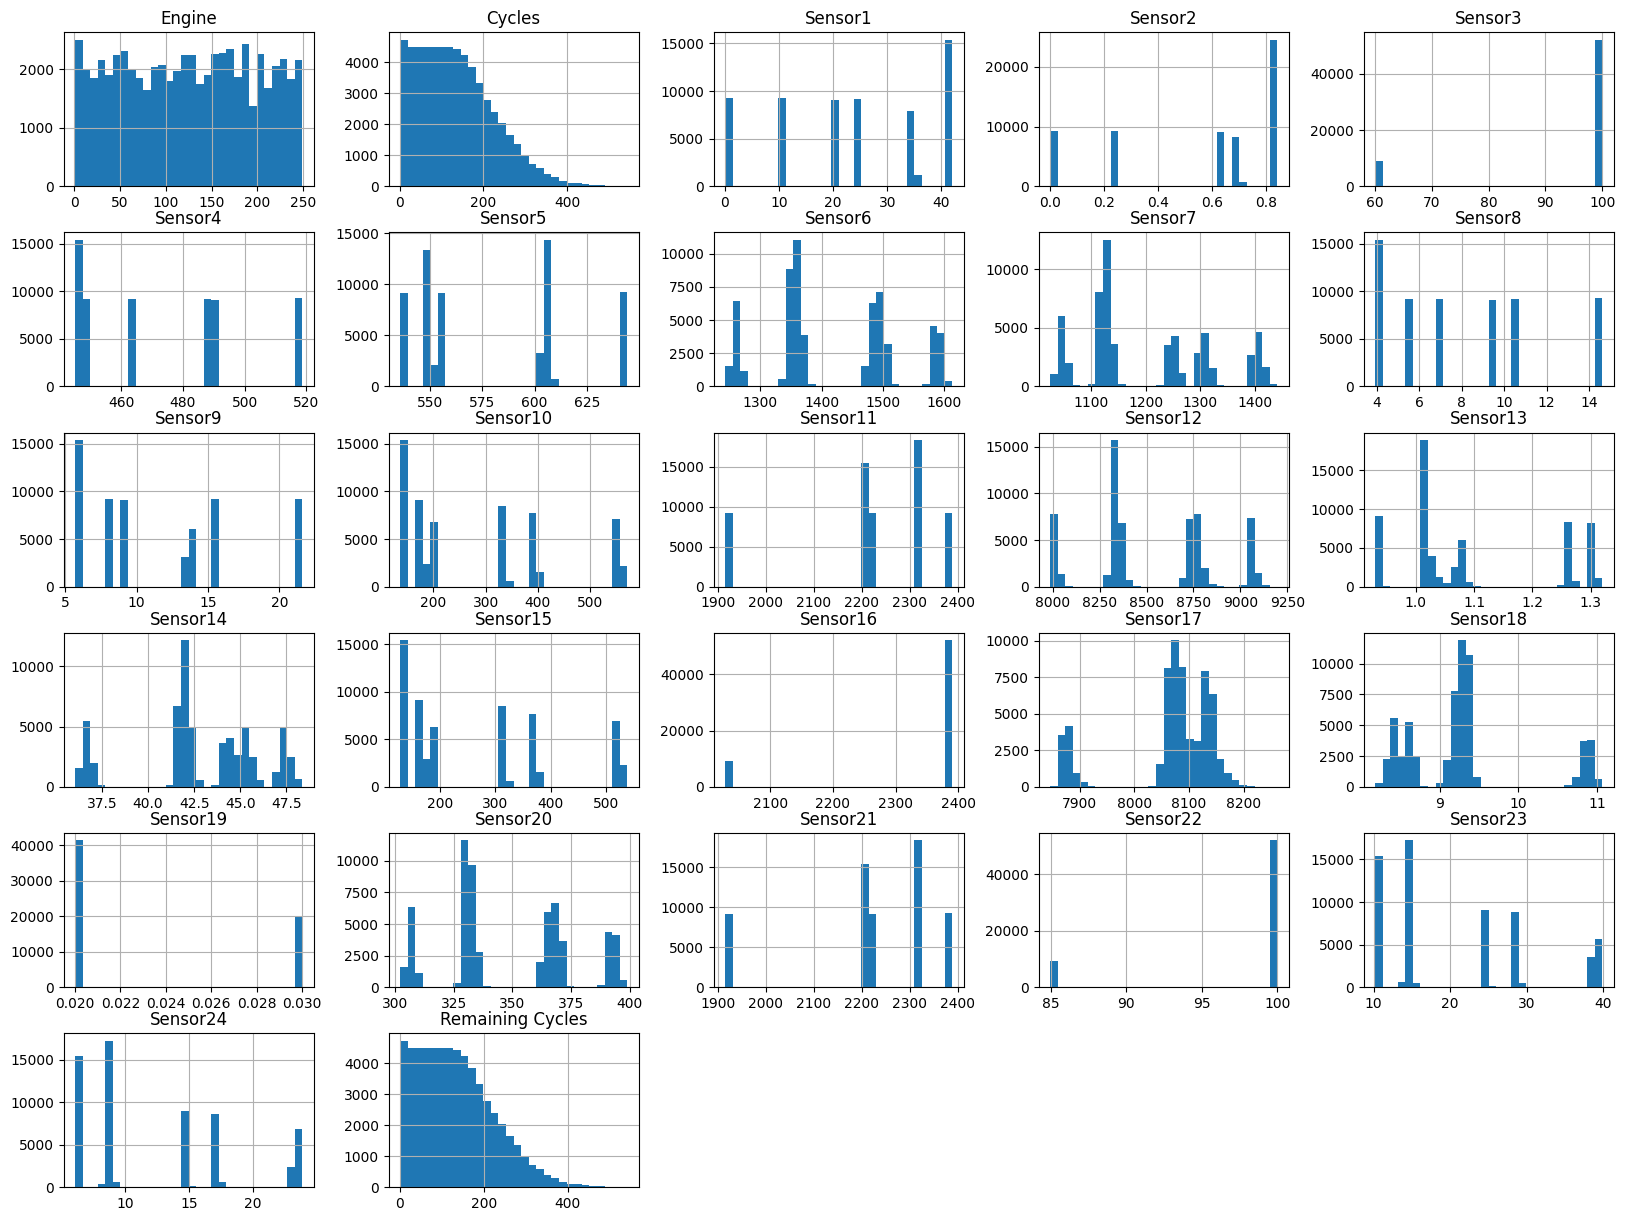

In [8]:
# Histograms

data.hist(bins=30, figsize=(20,15))
plt.show()

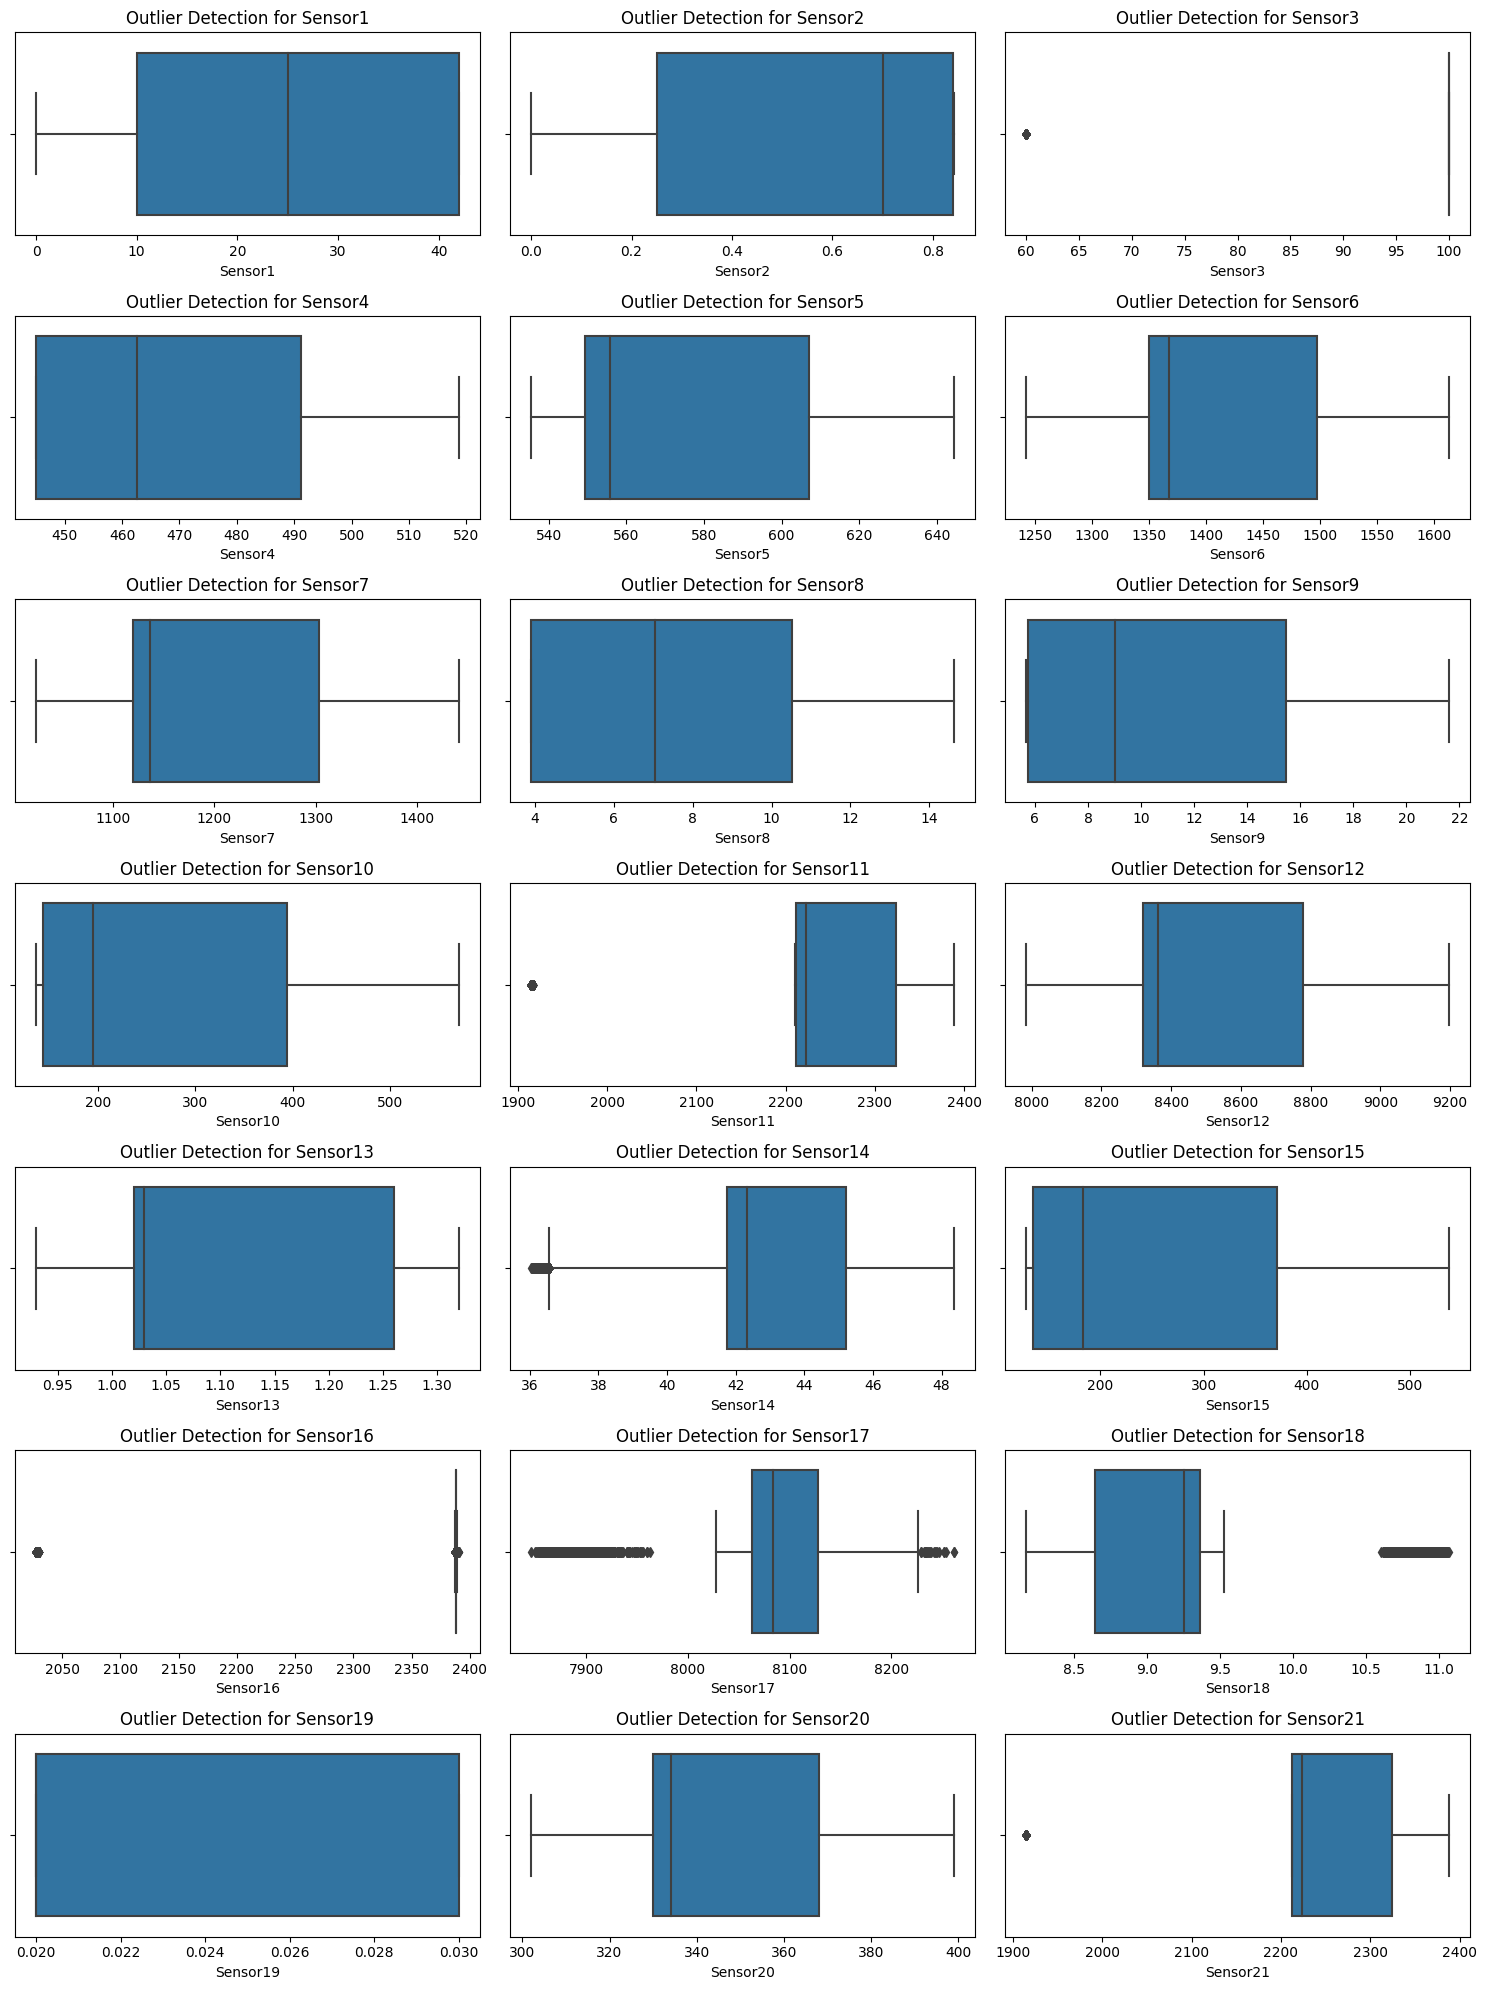

In [9]:
# Boxplots for outlier detection

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()

for i, col in enumerate(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20', 'Sensor21']):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

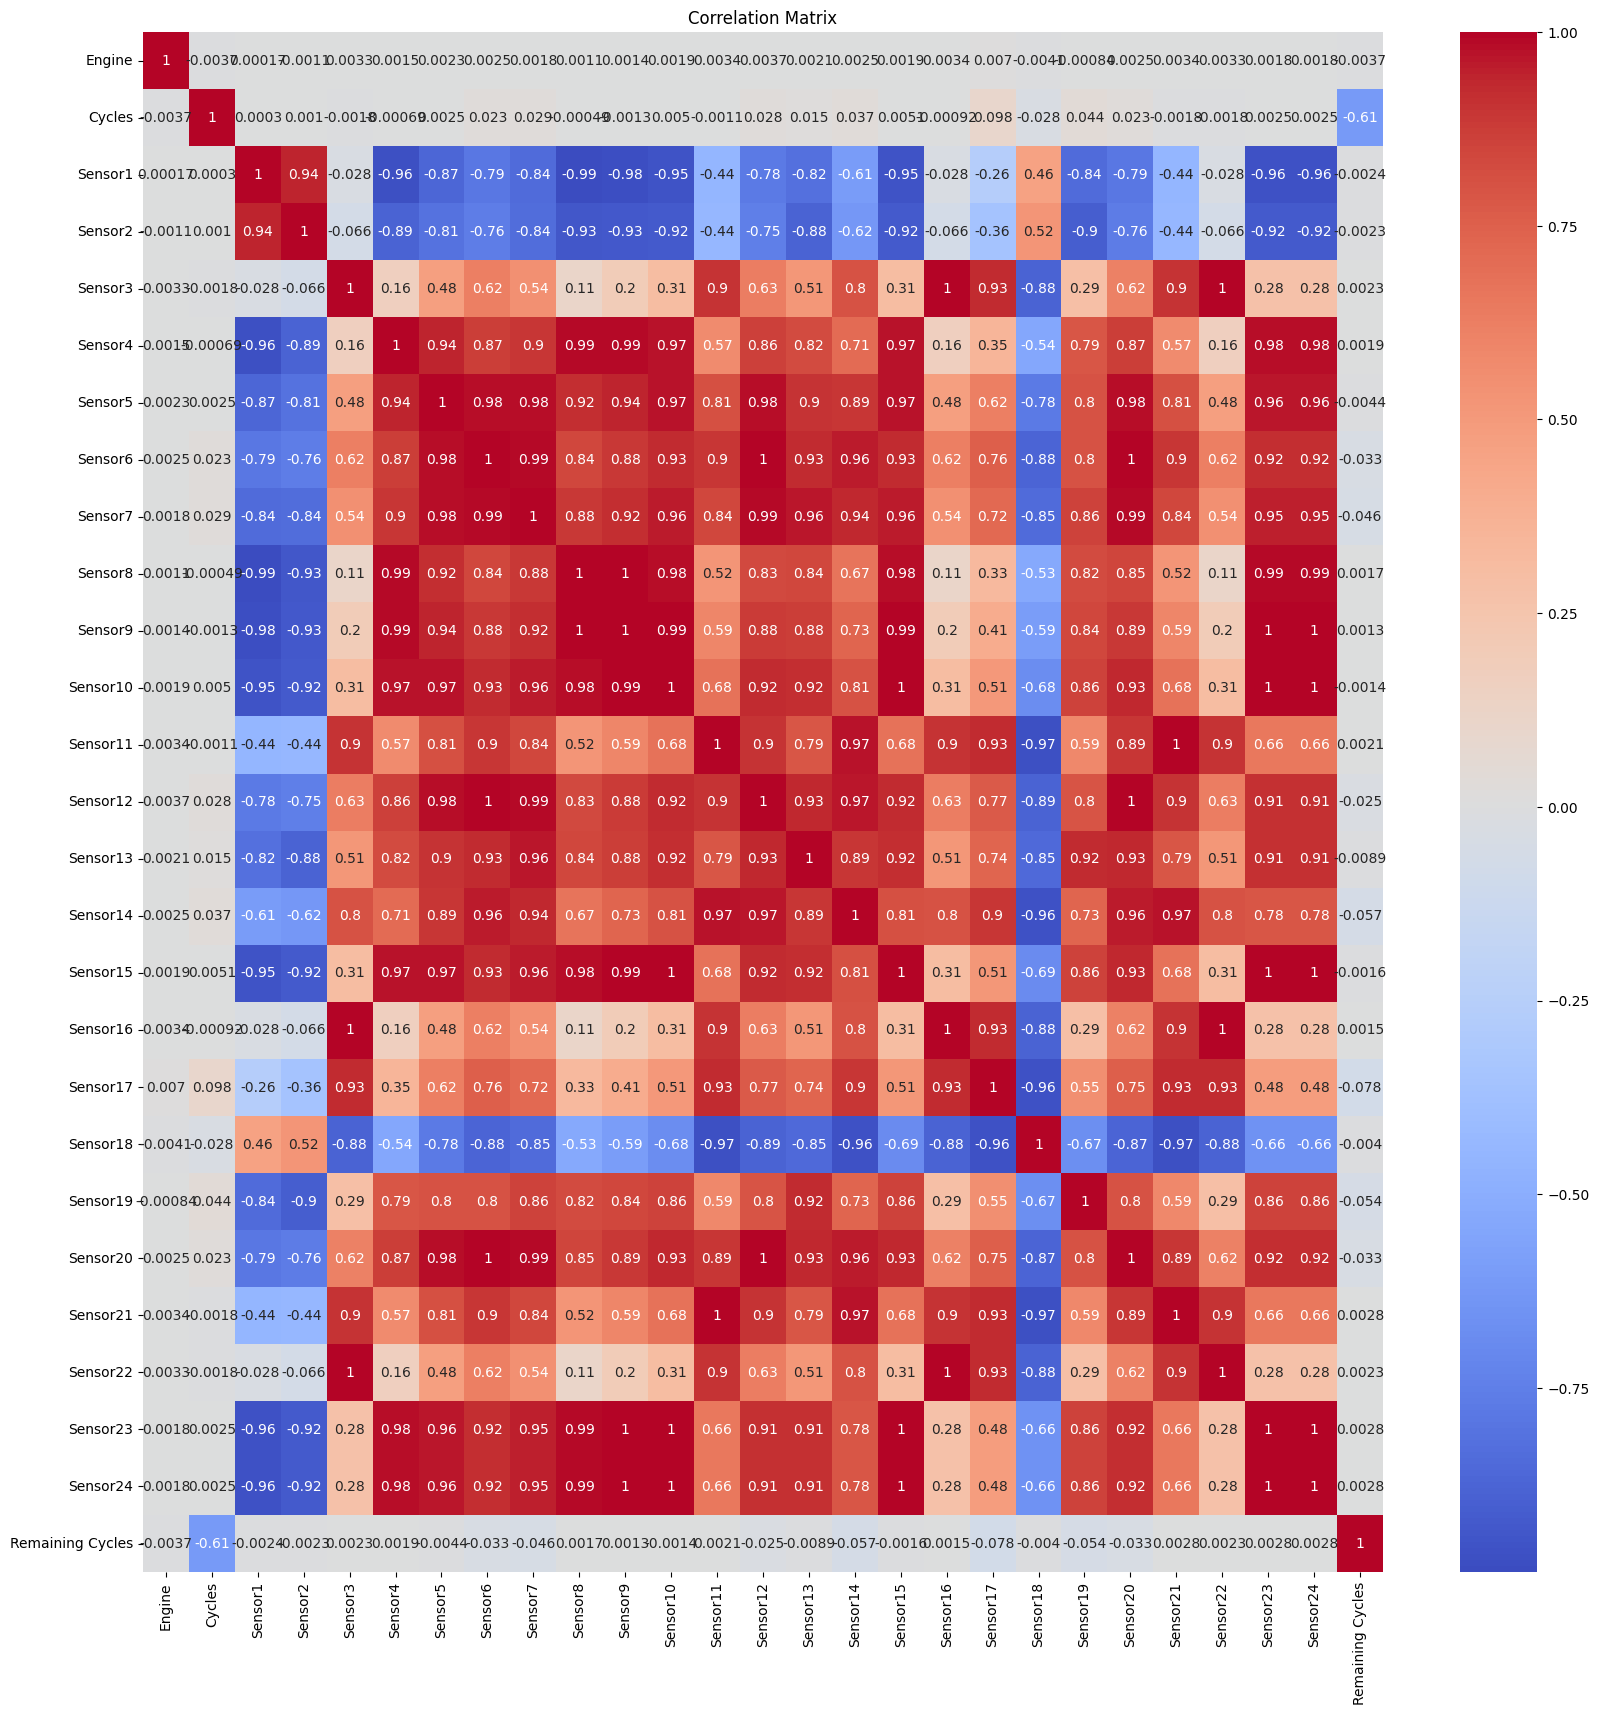

In [10]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

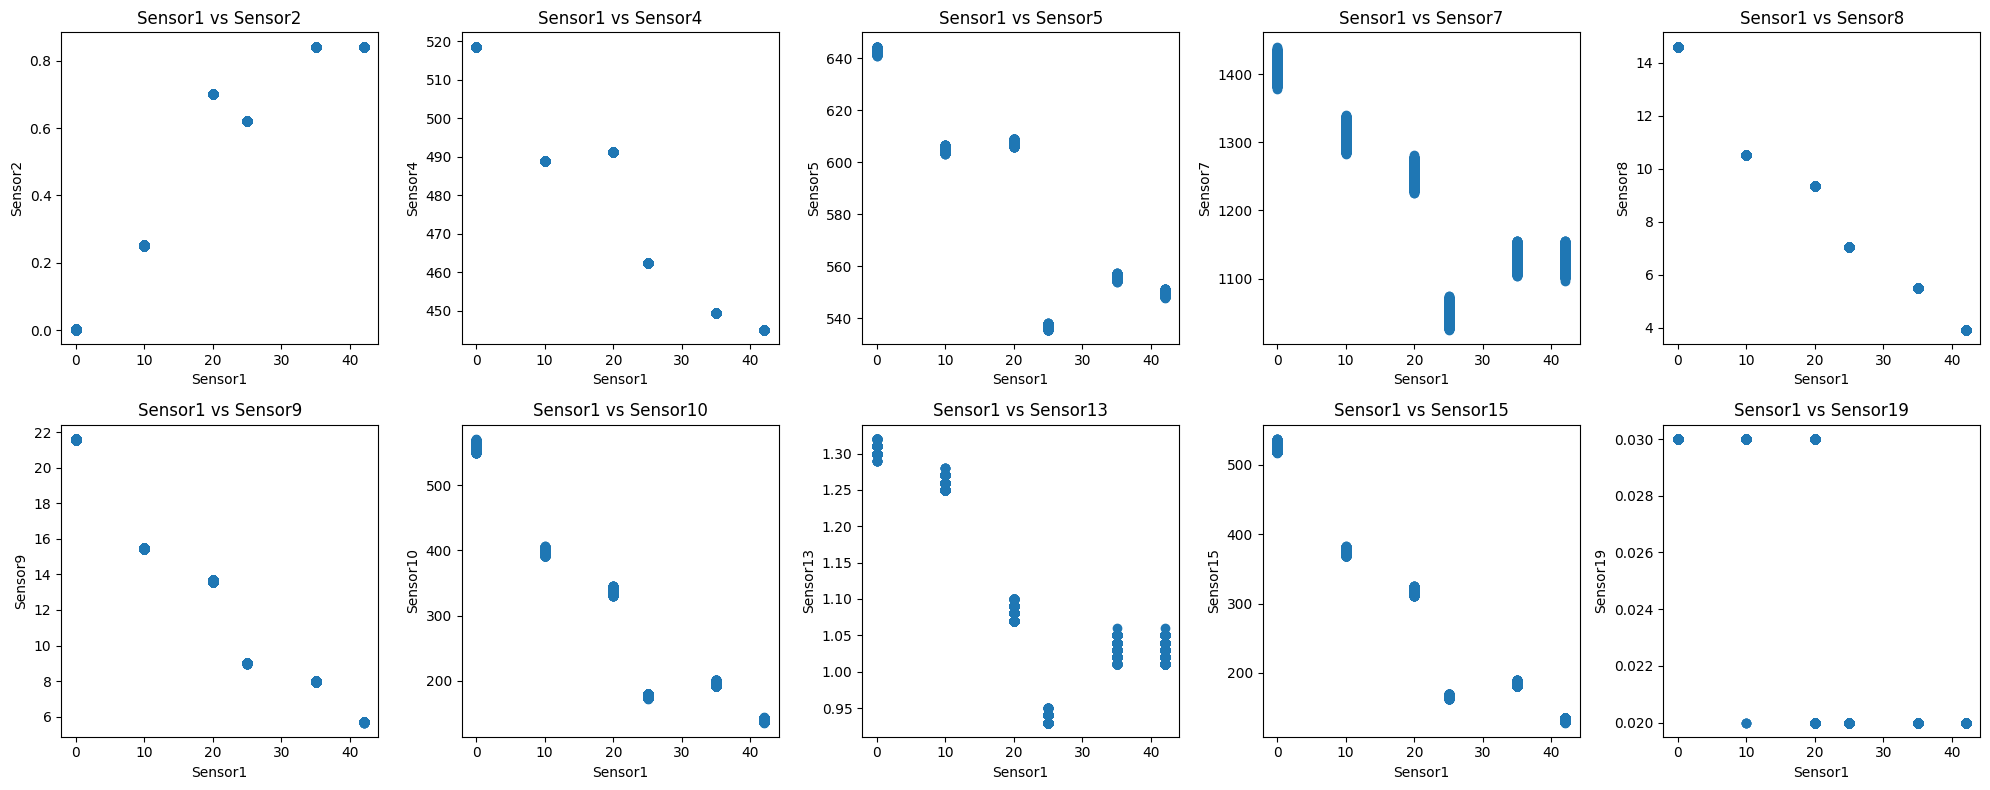

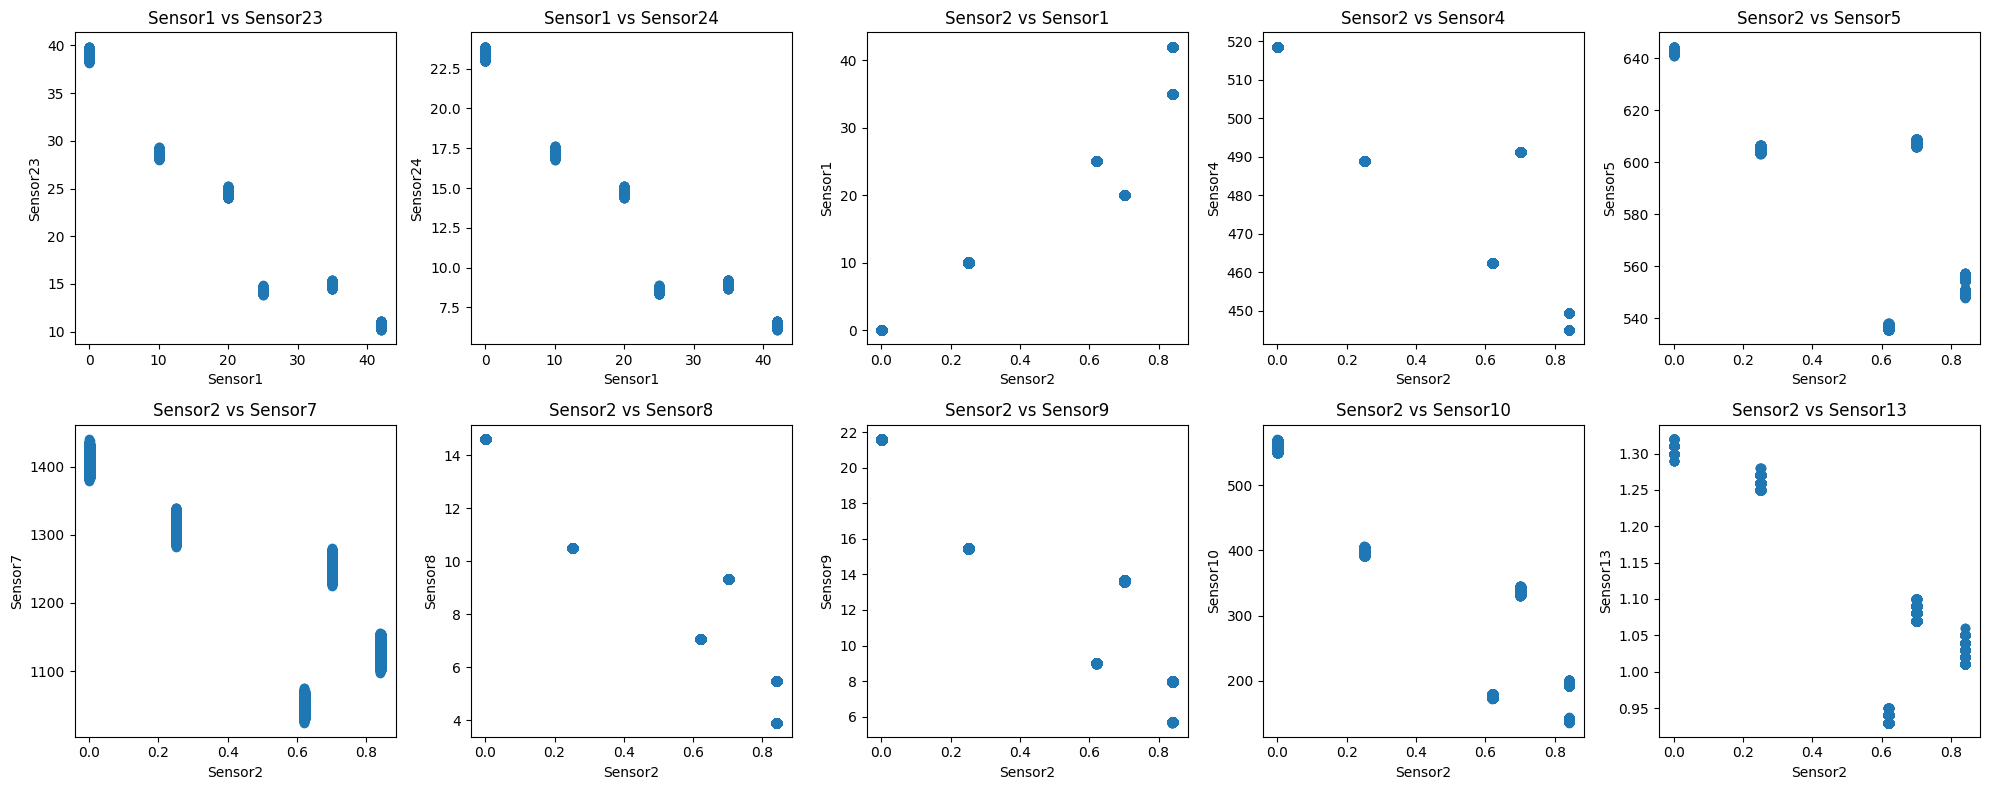

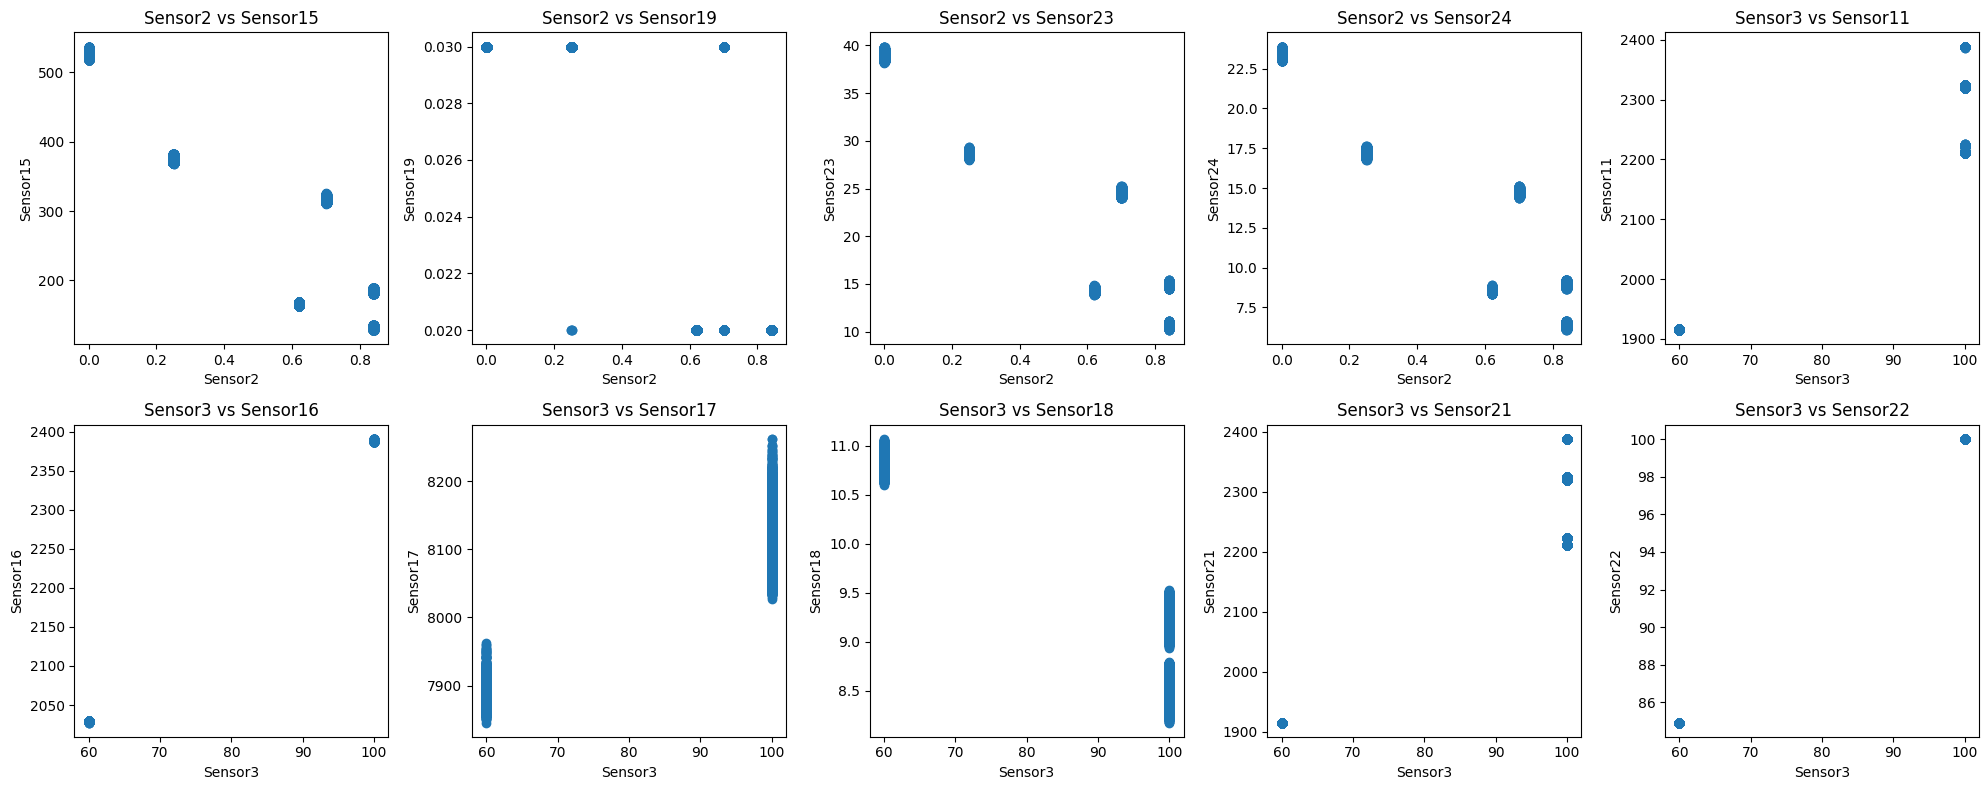

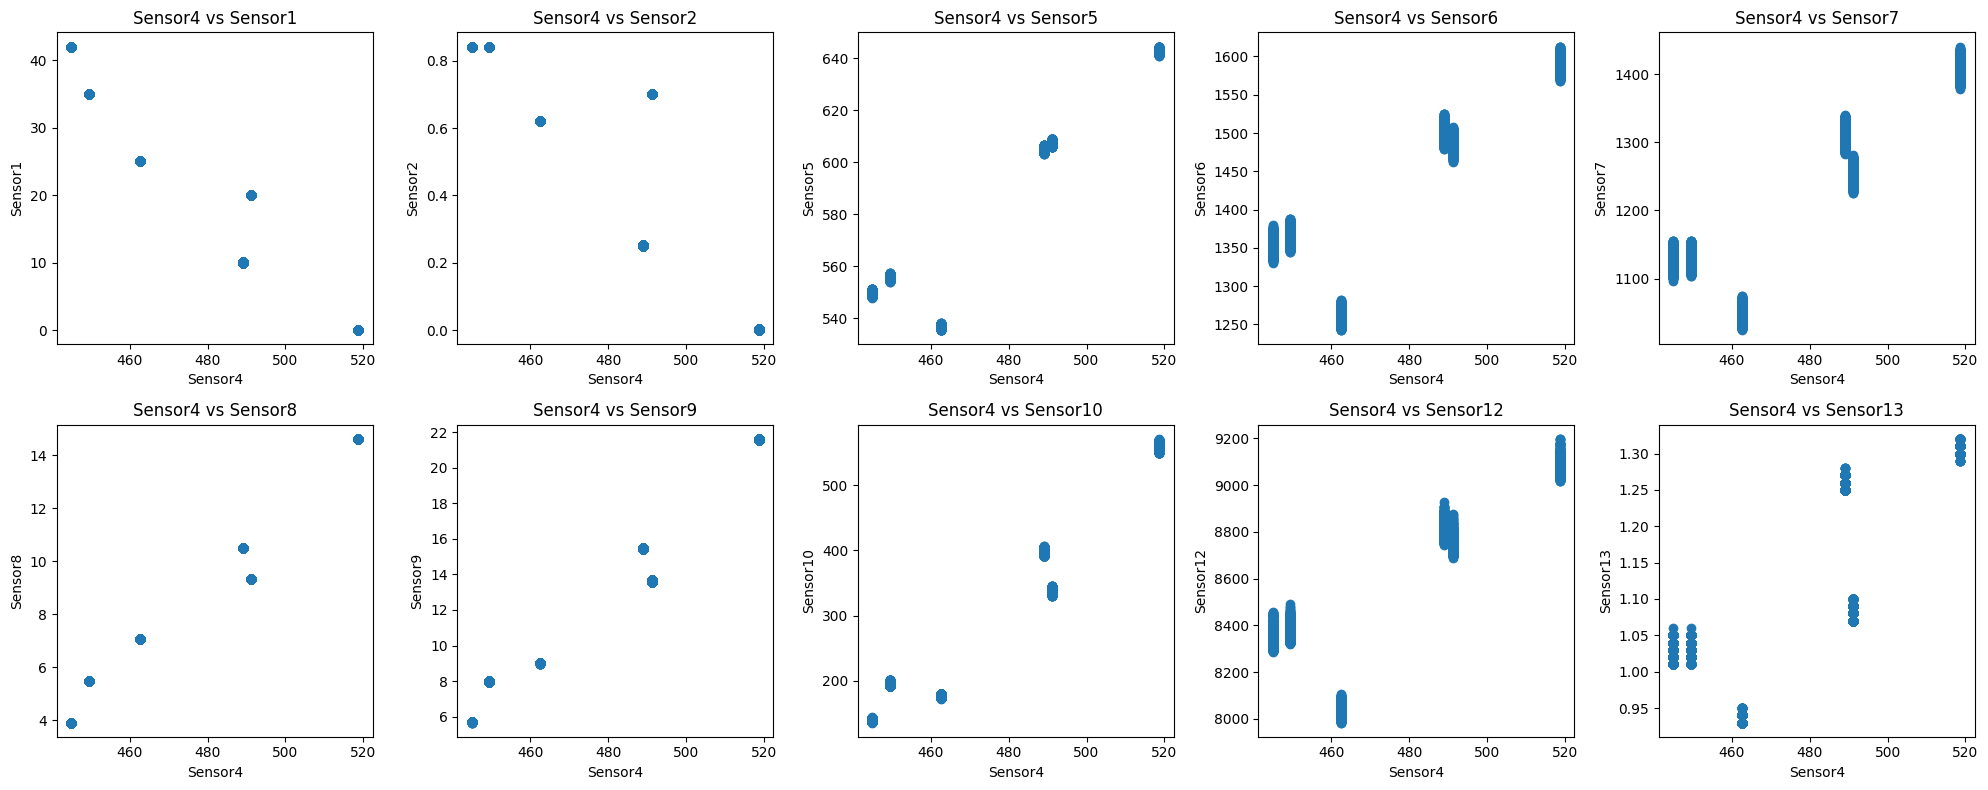

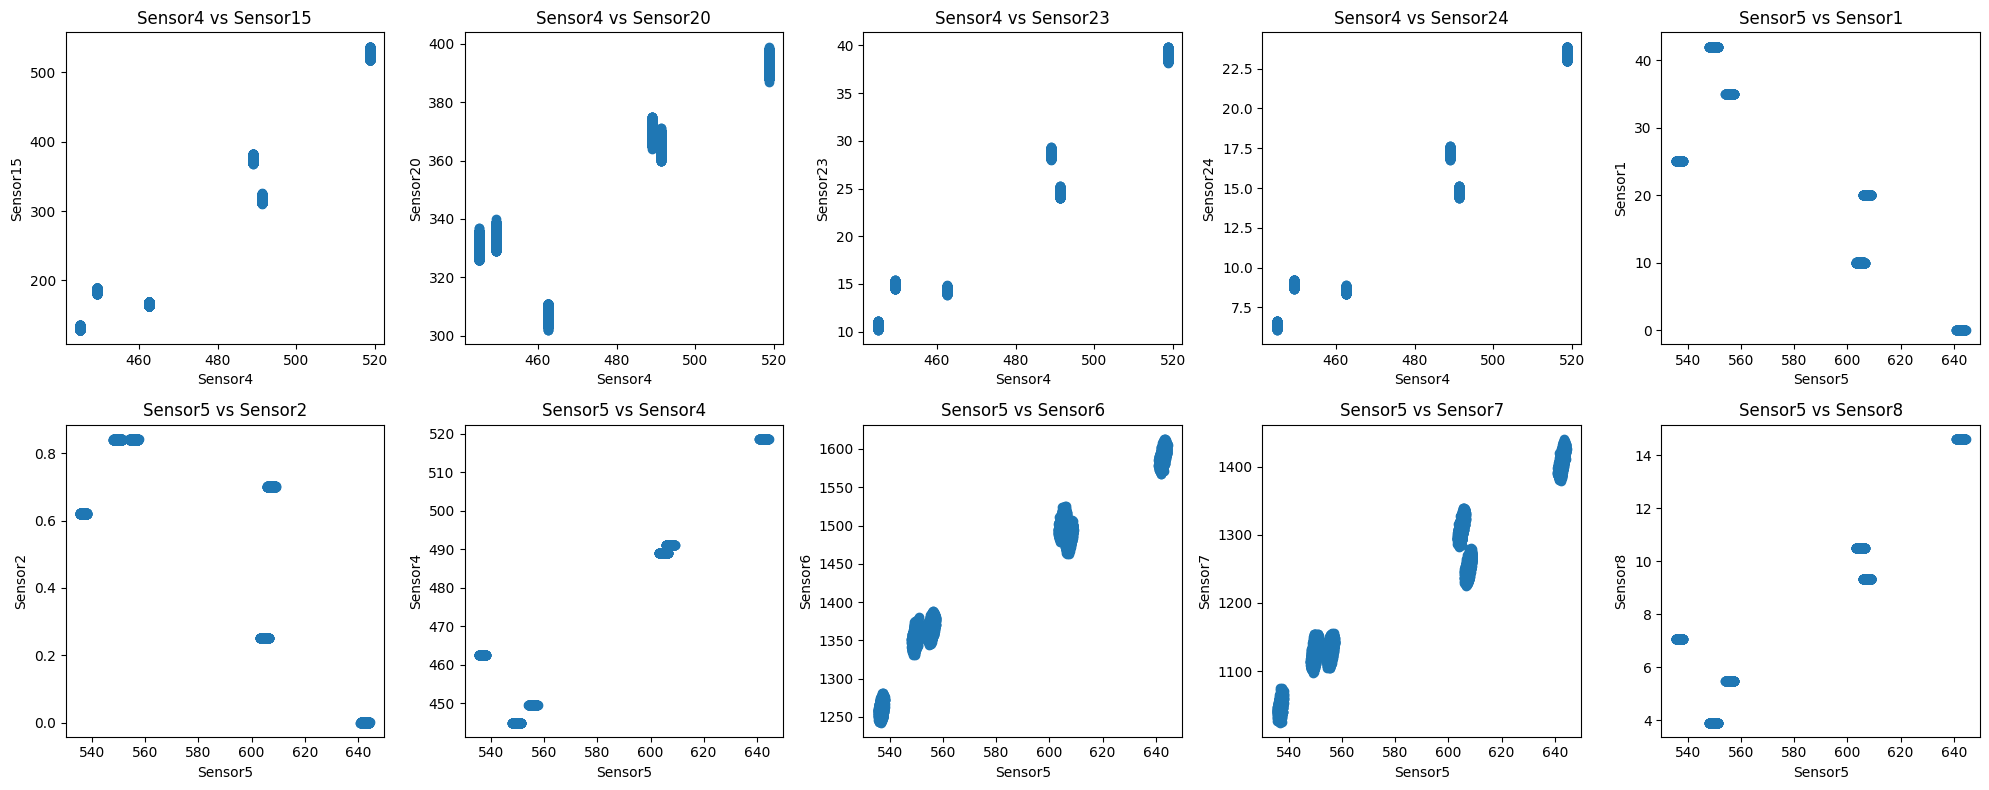

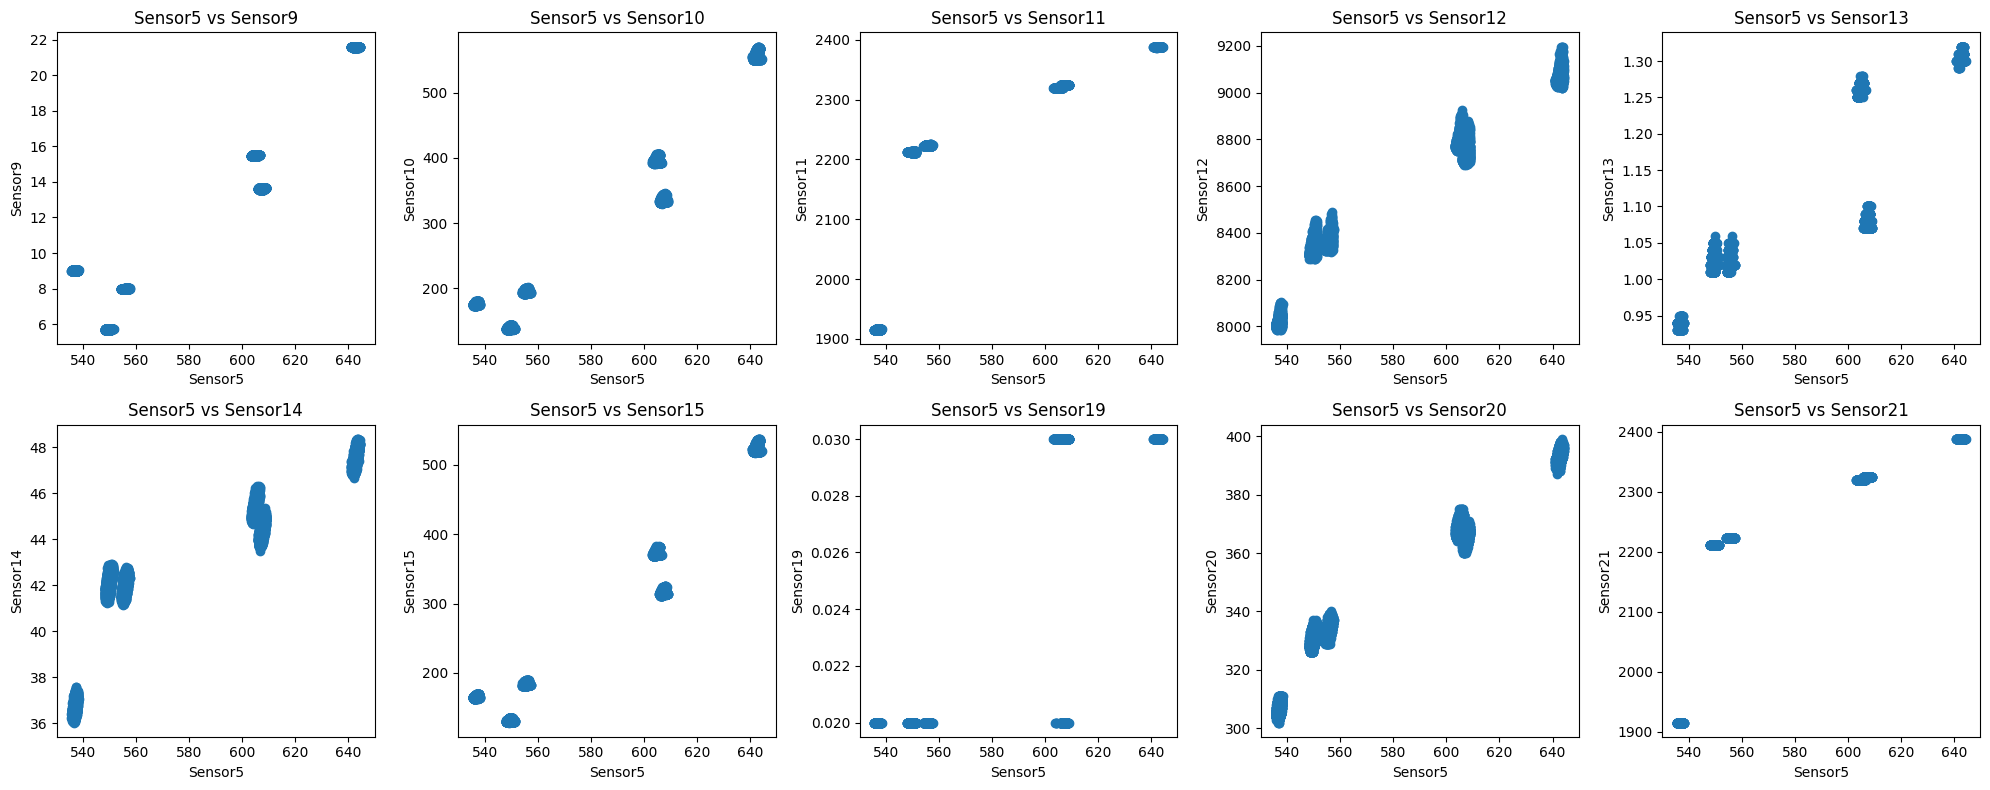

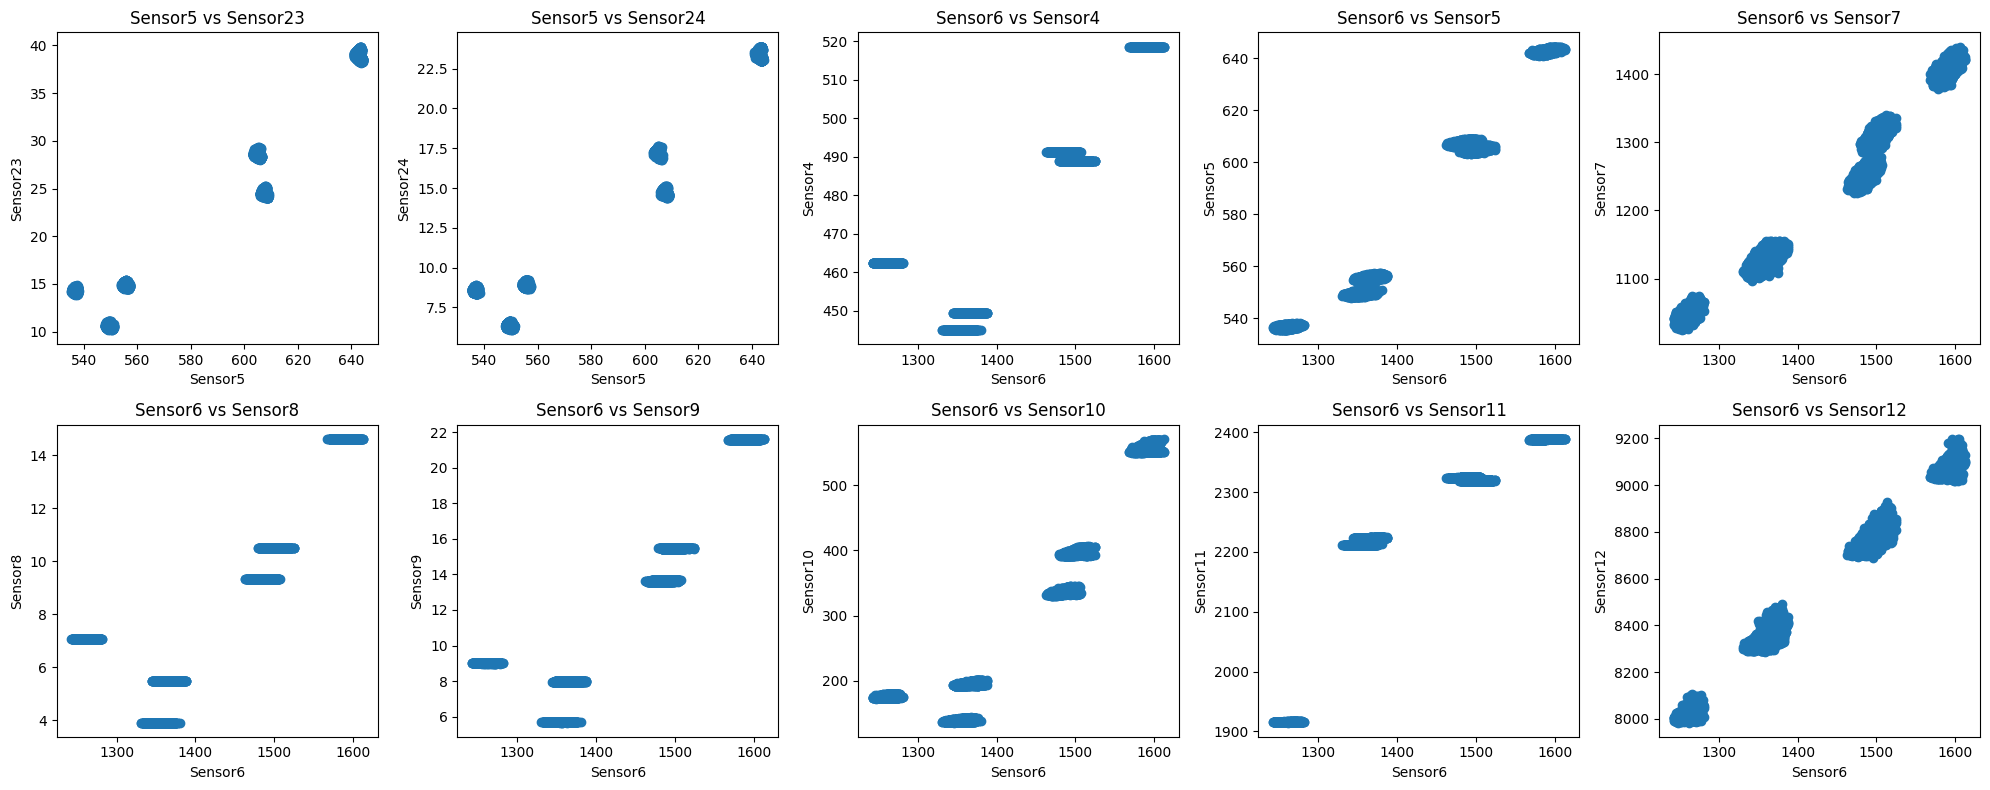

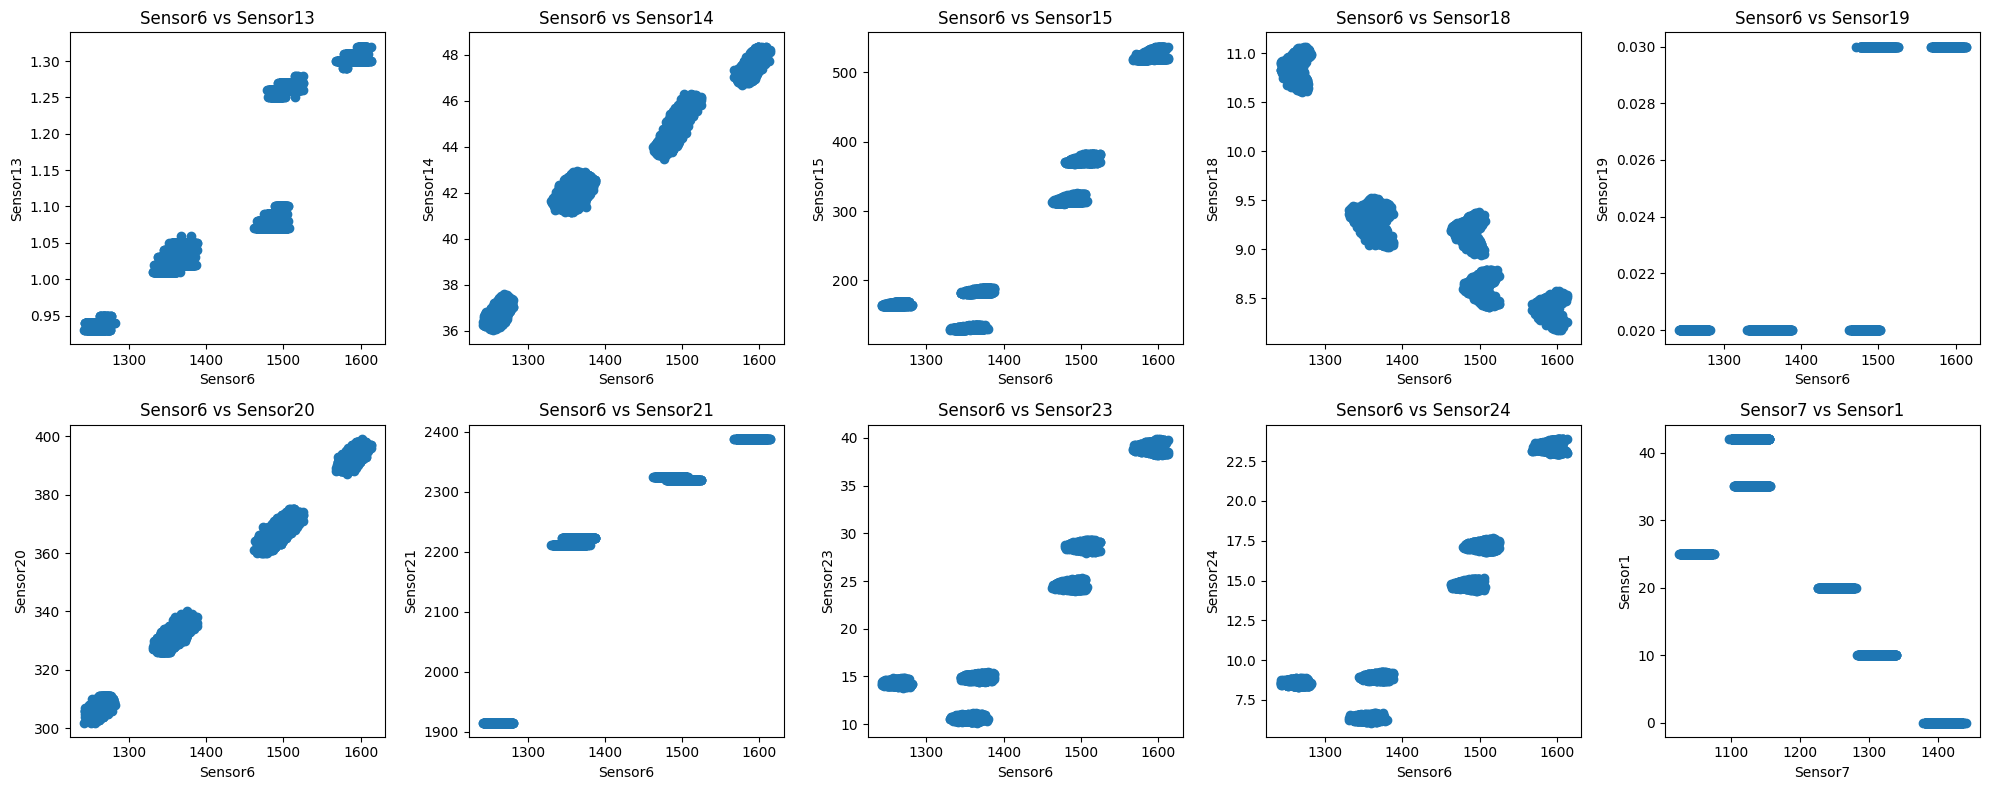

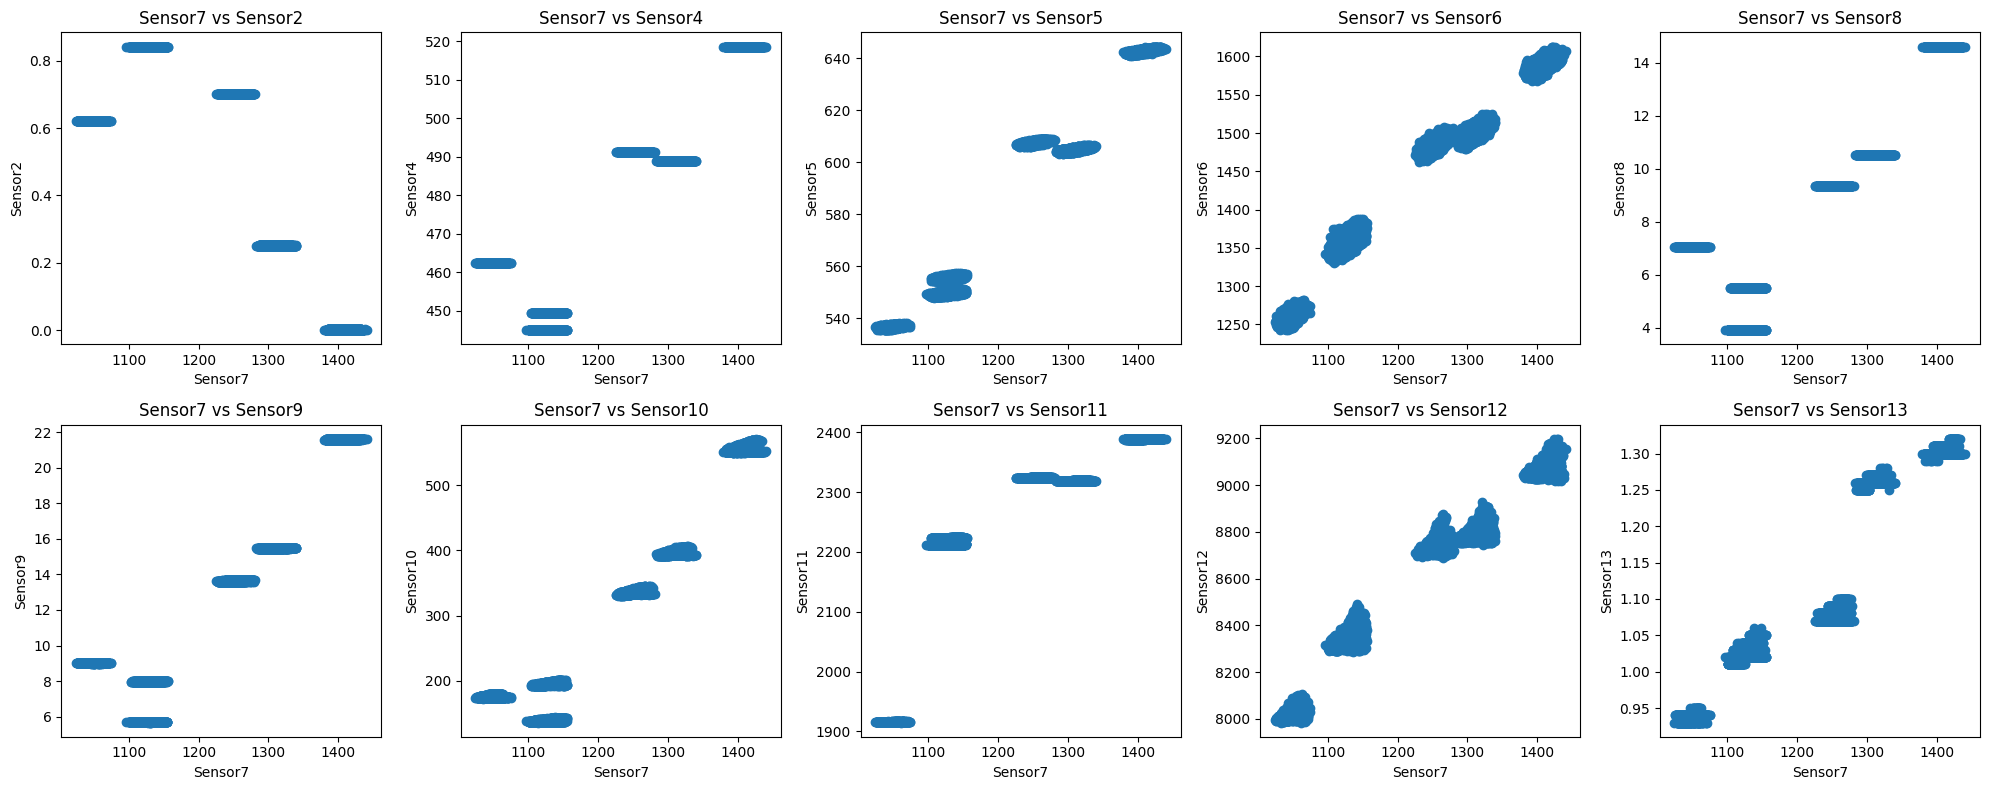

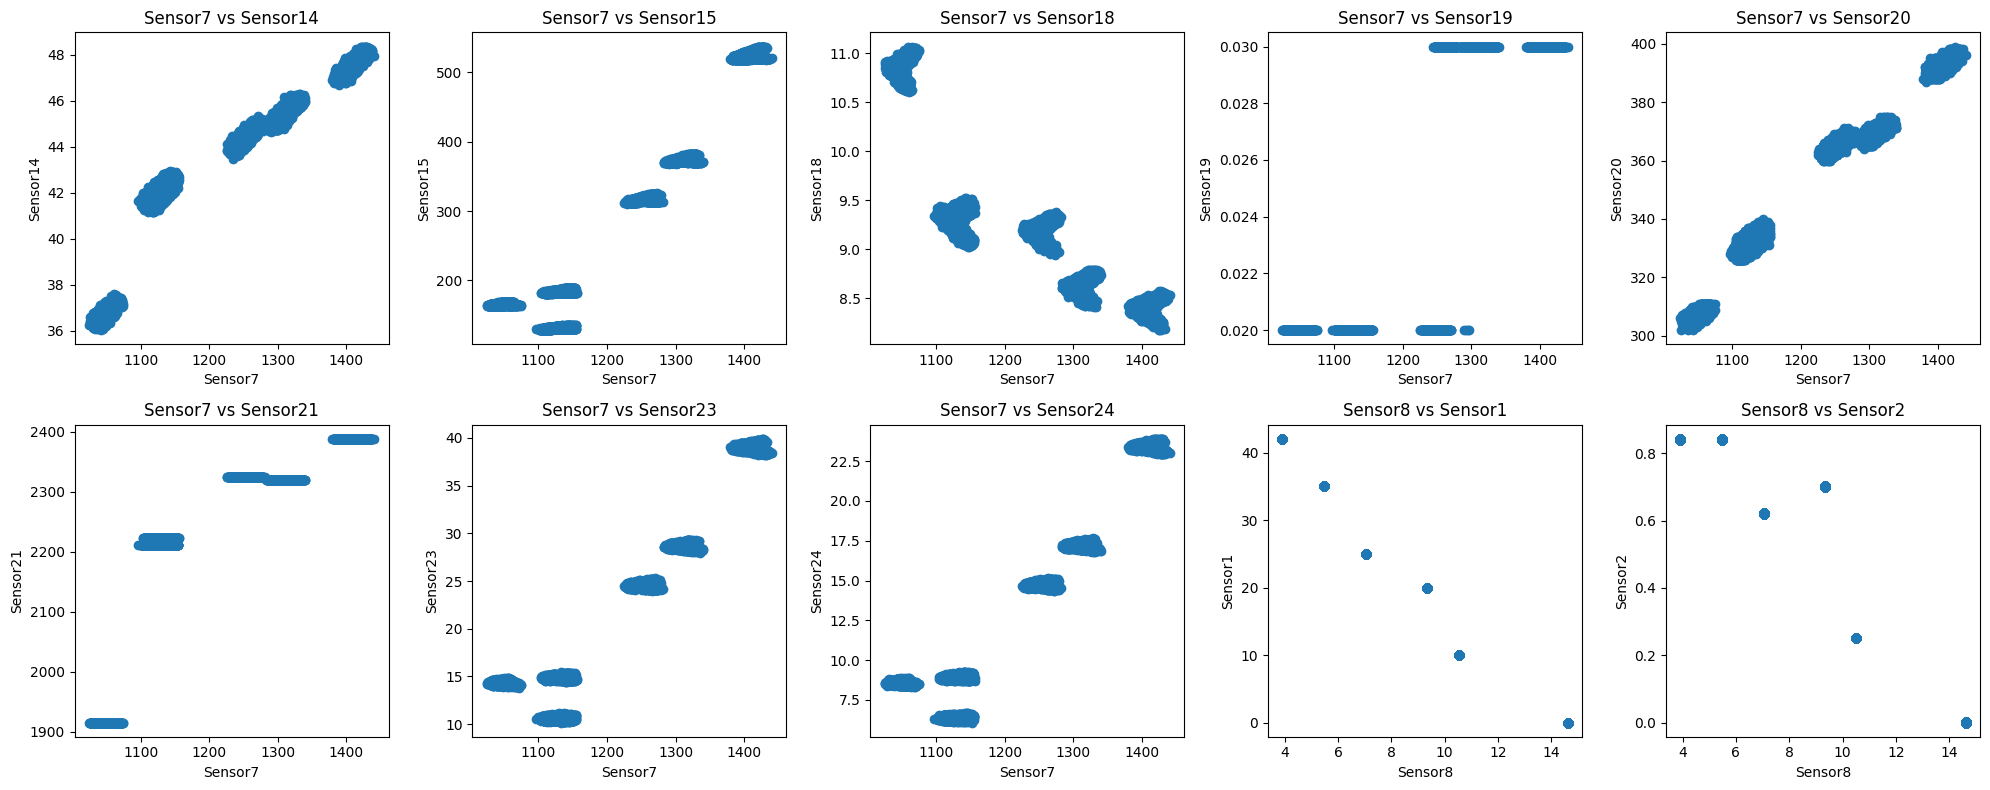

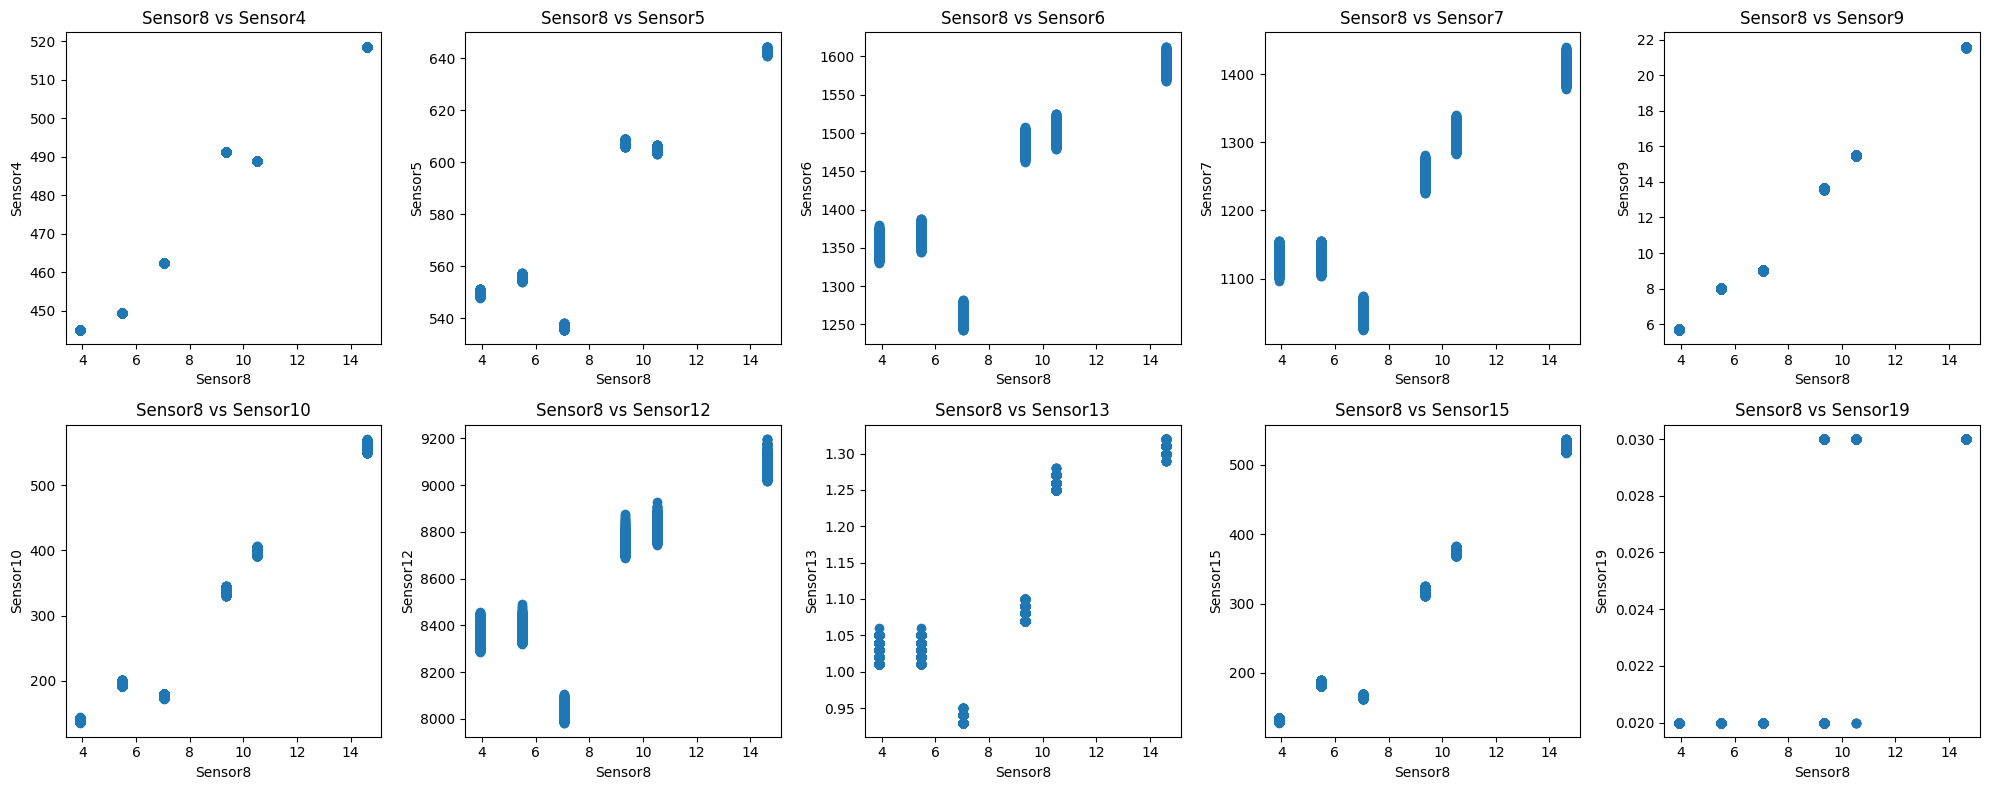

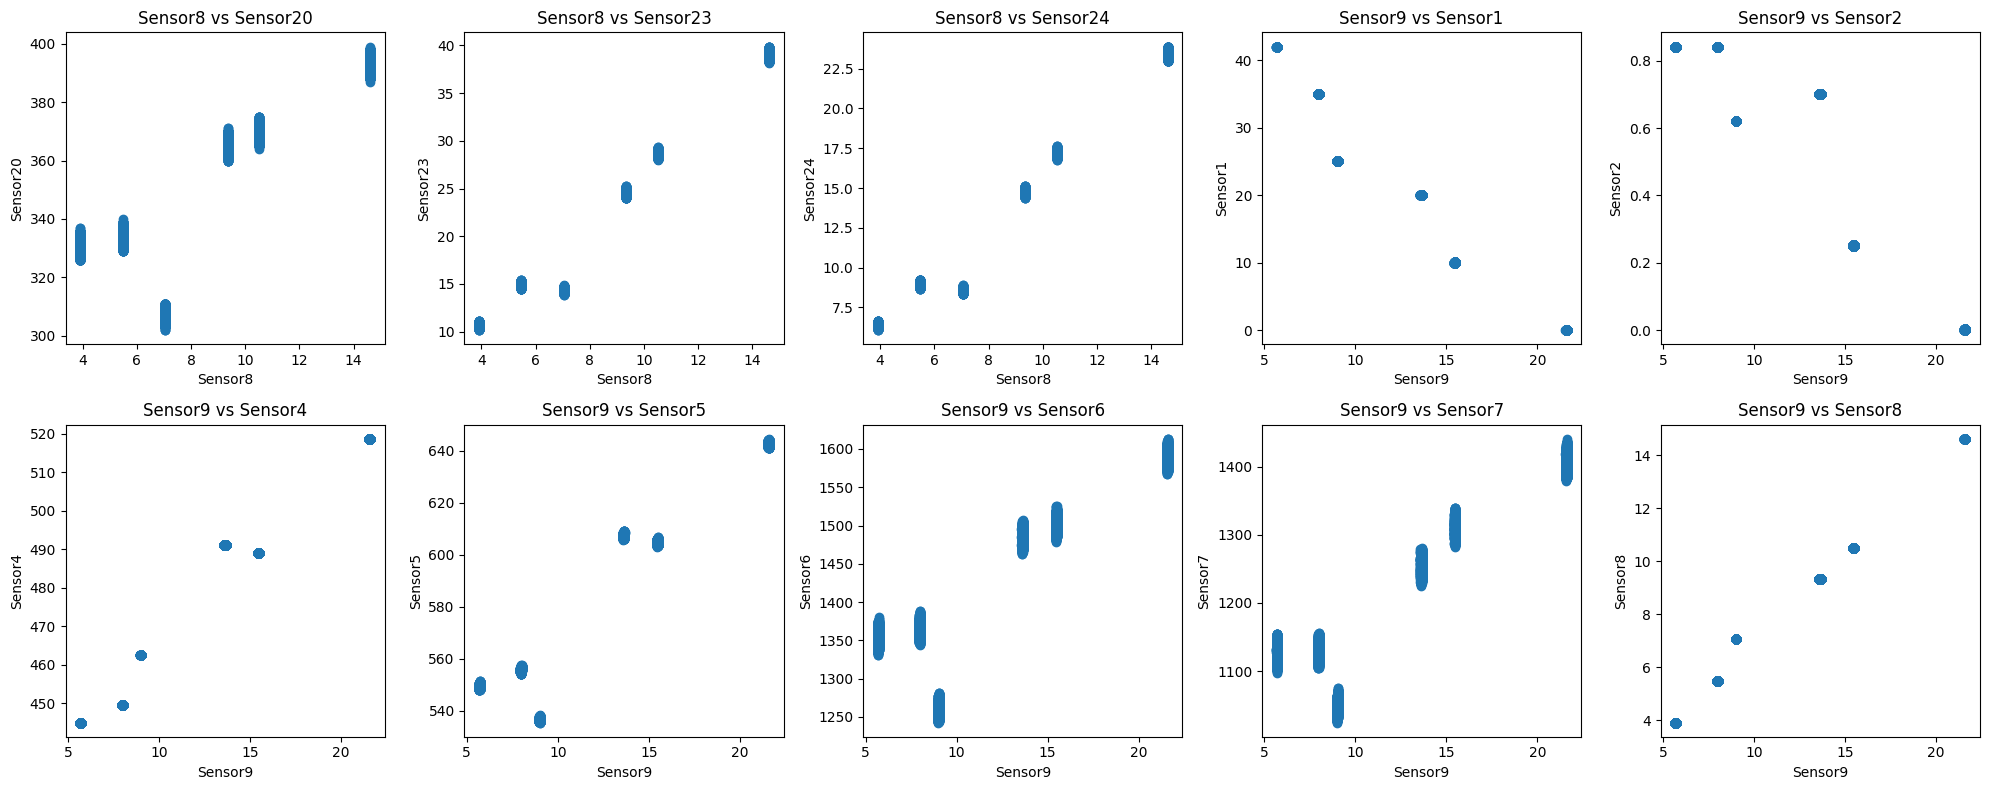

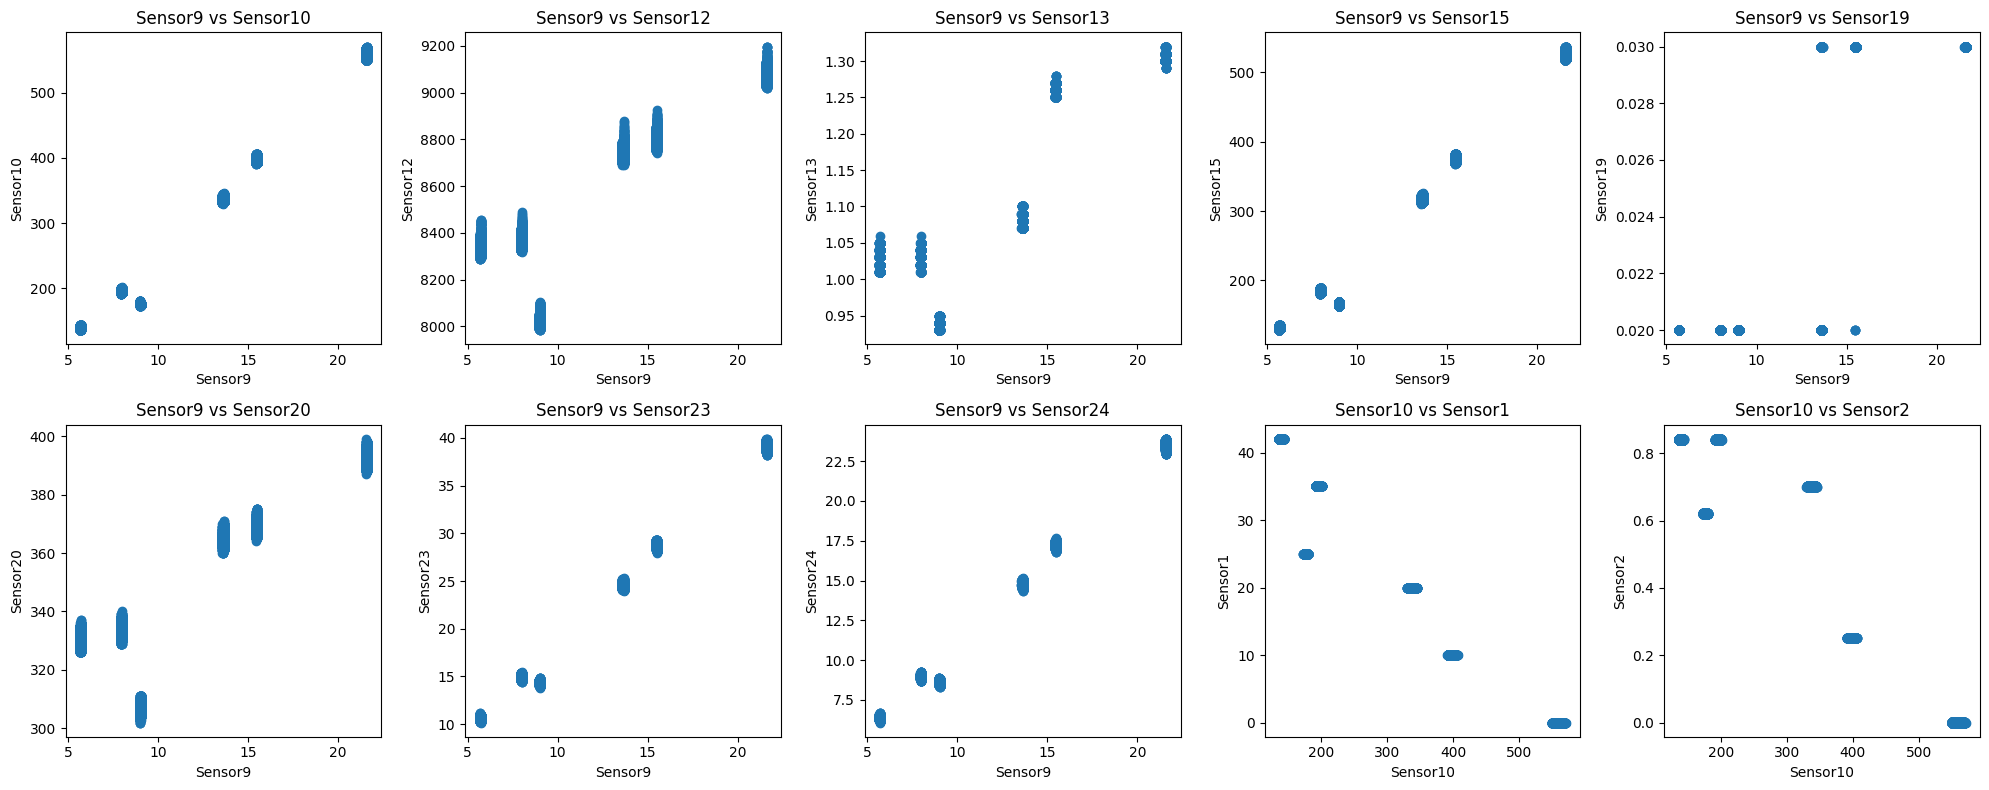

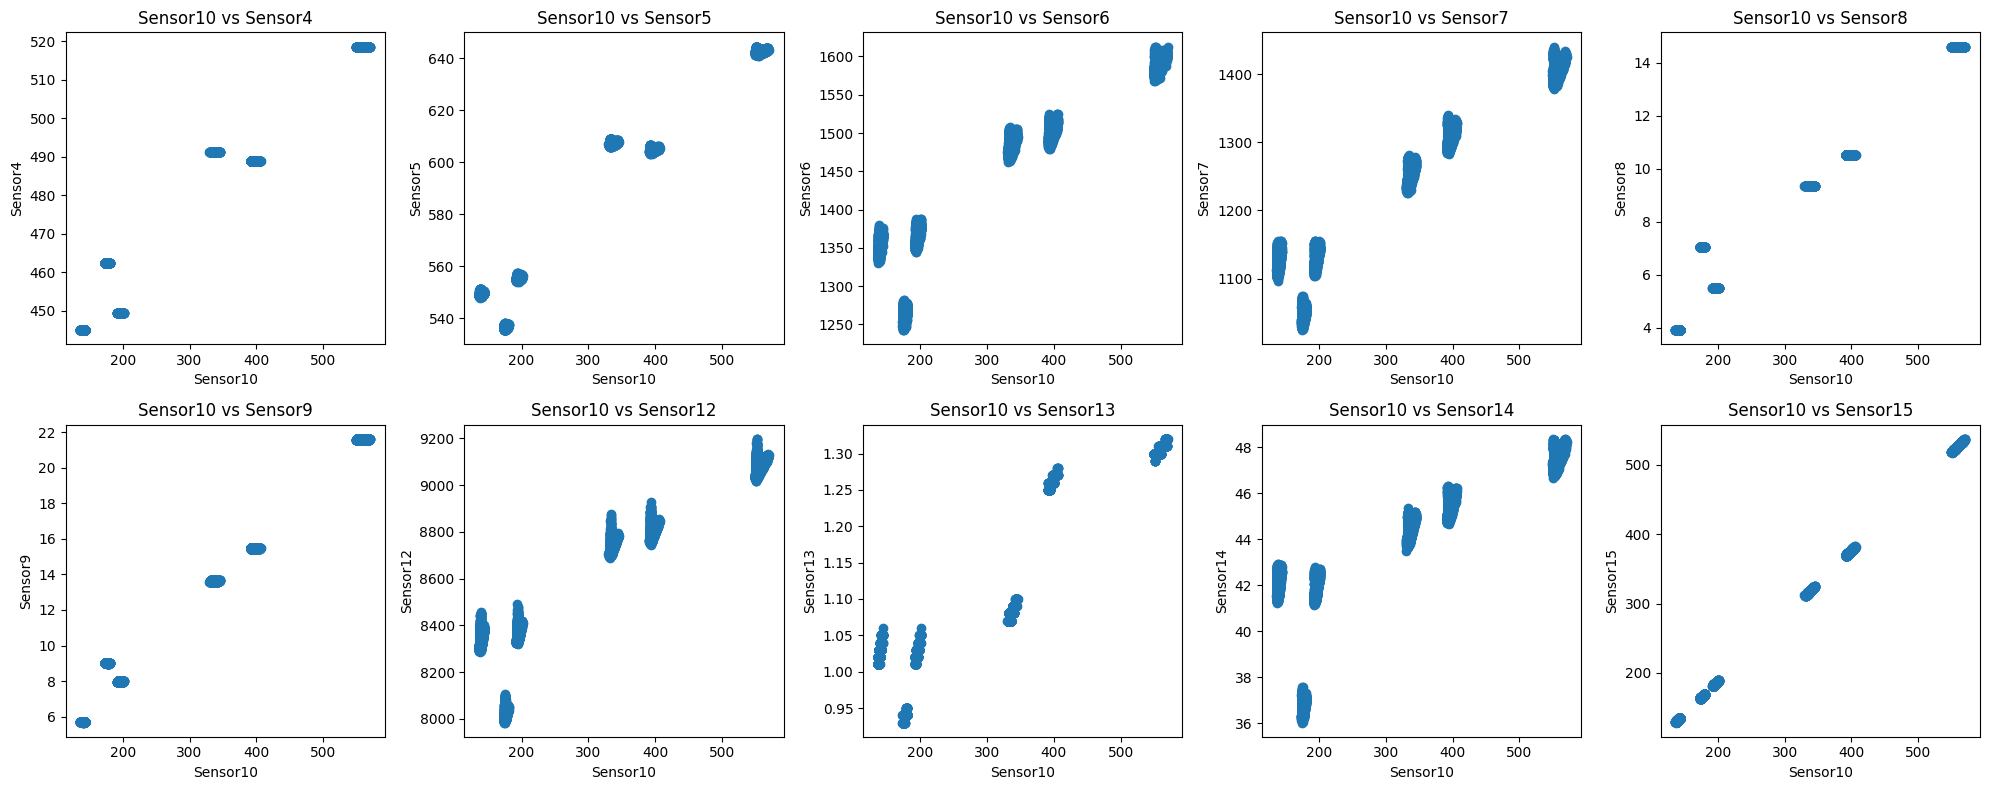

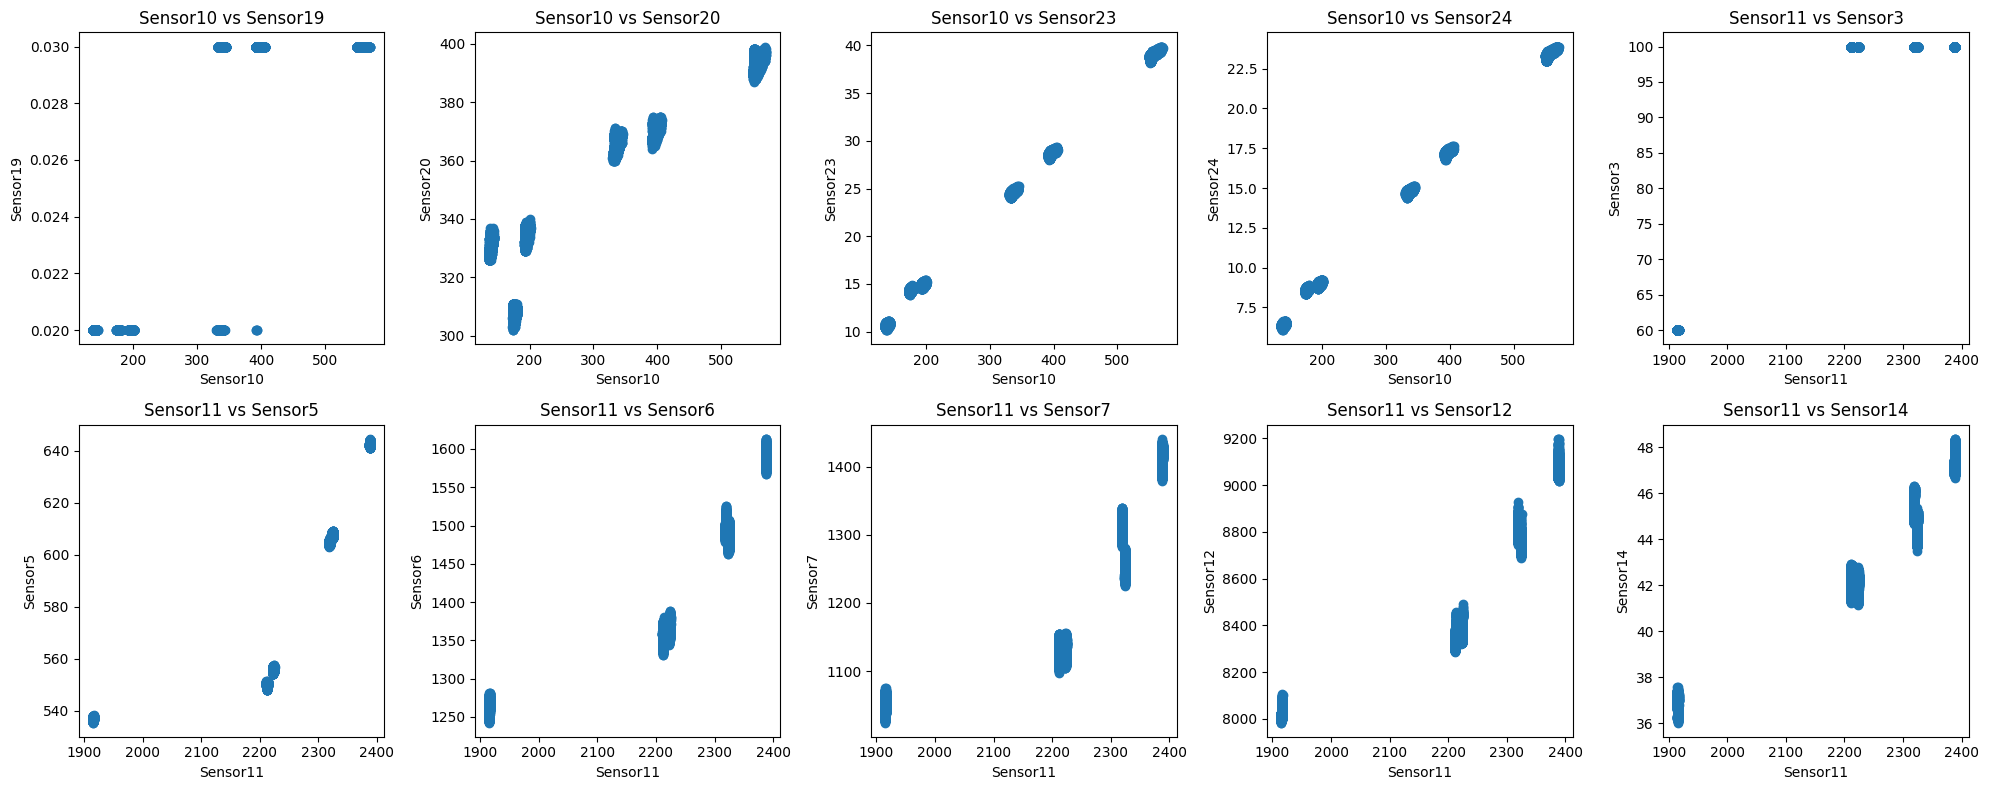

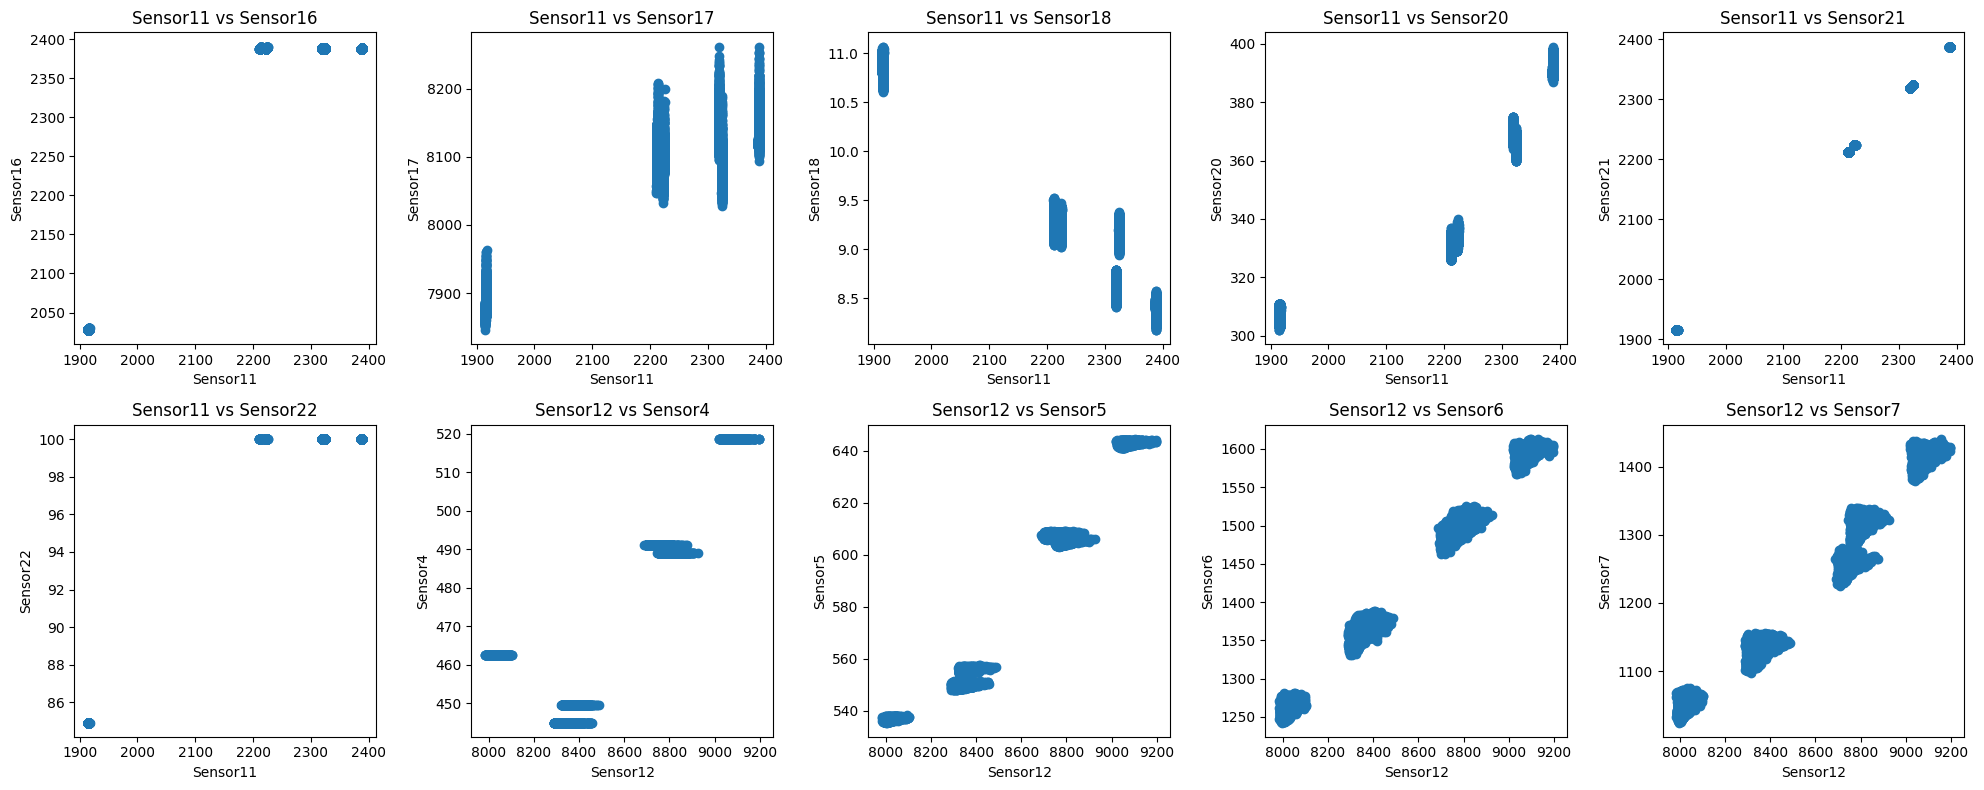

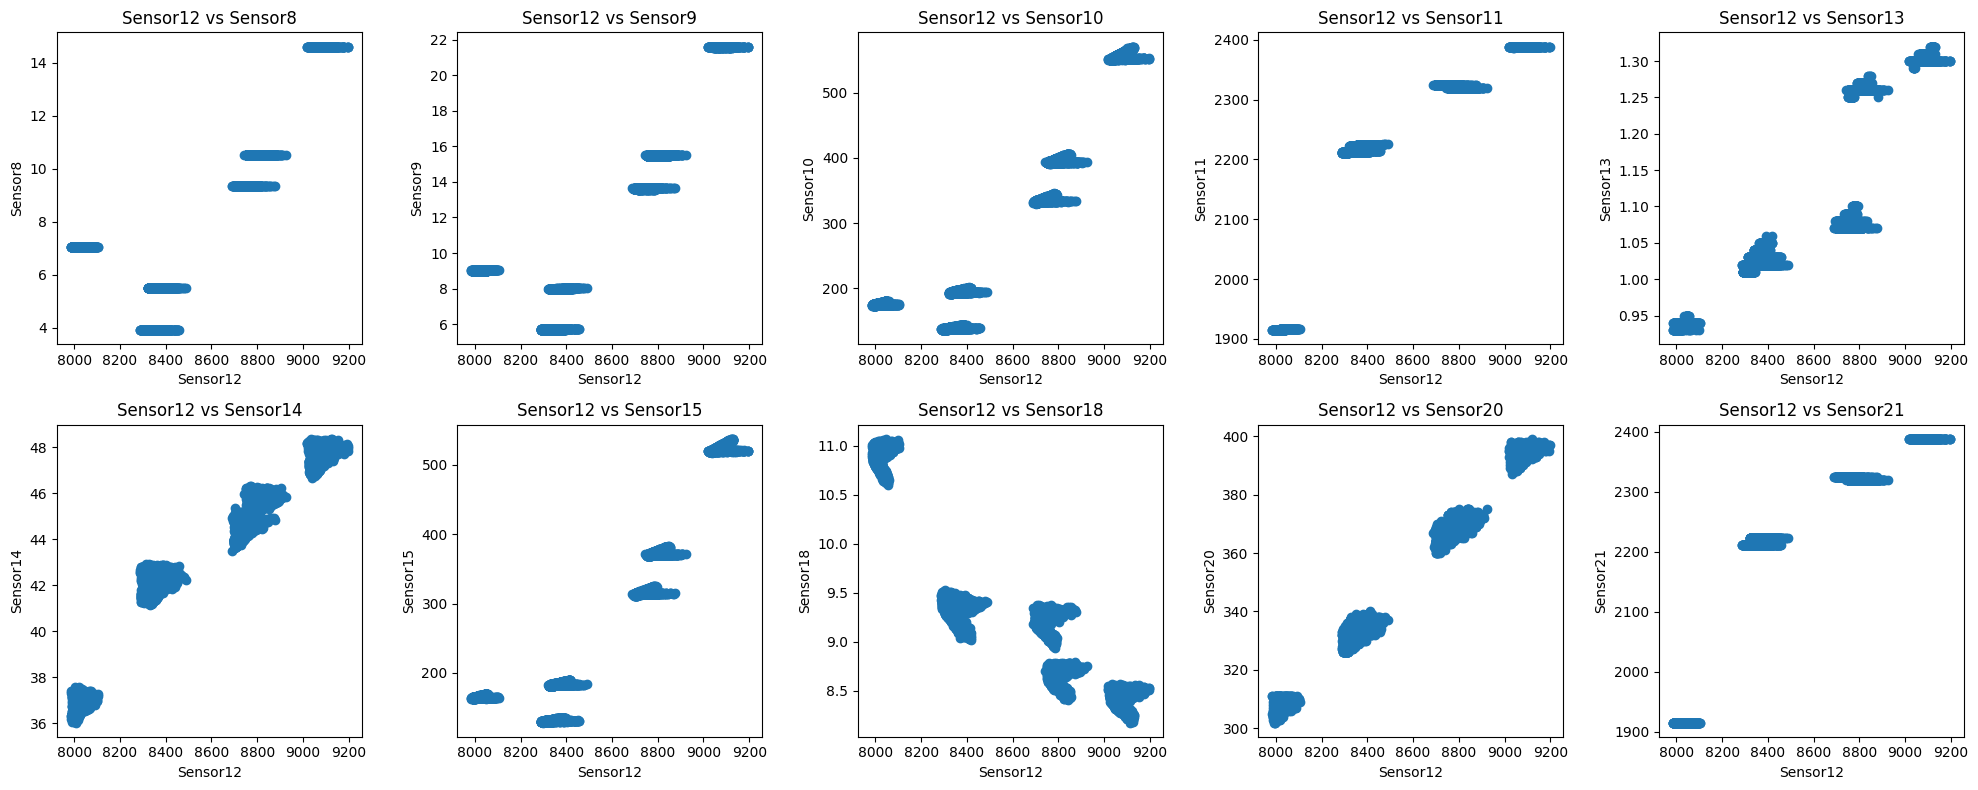

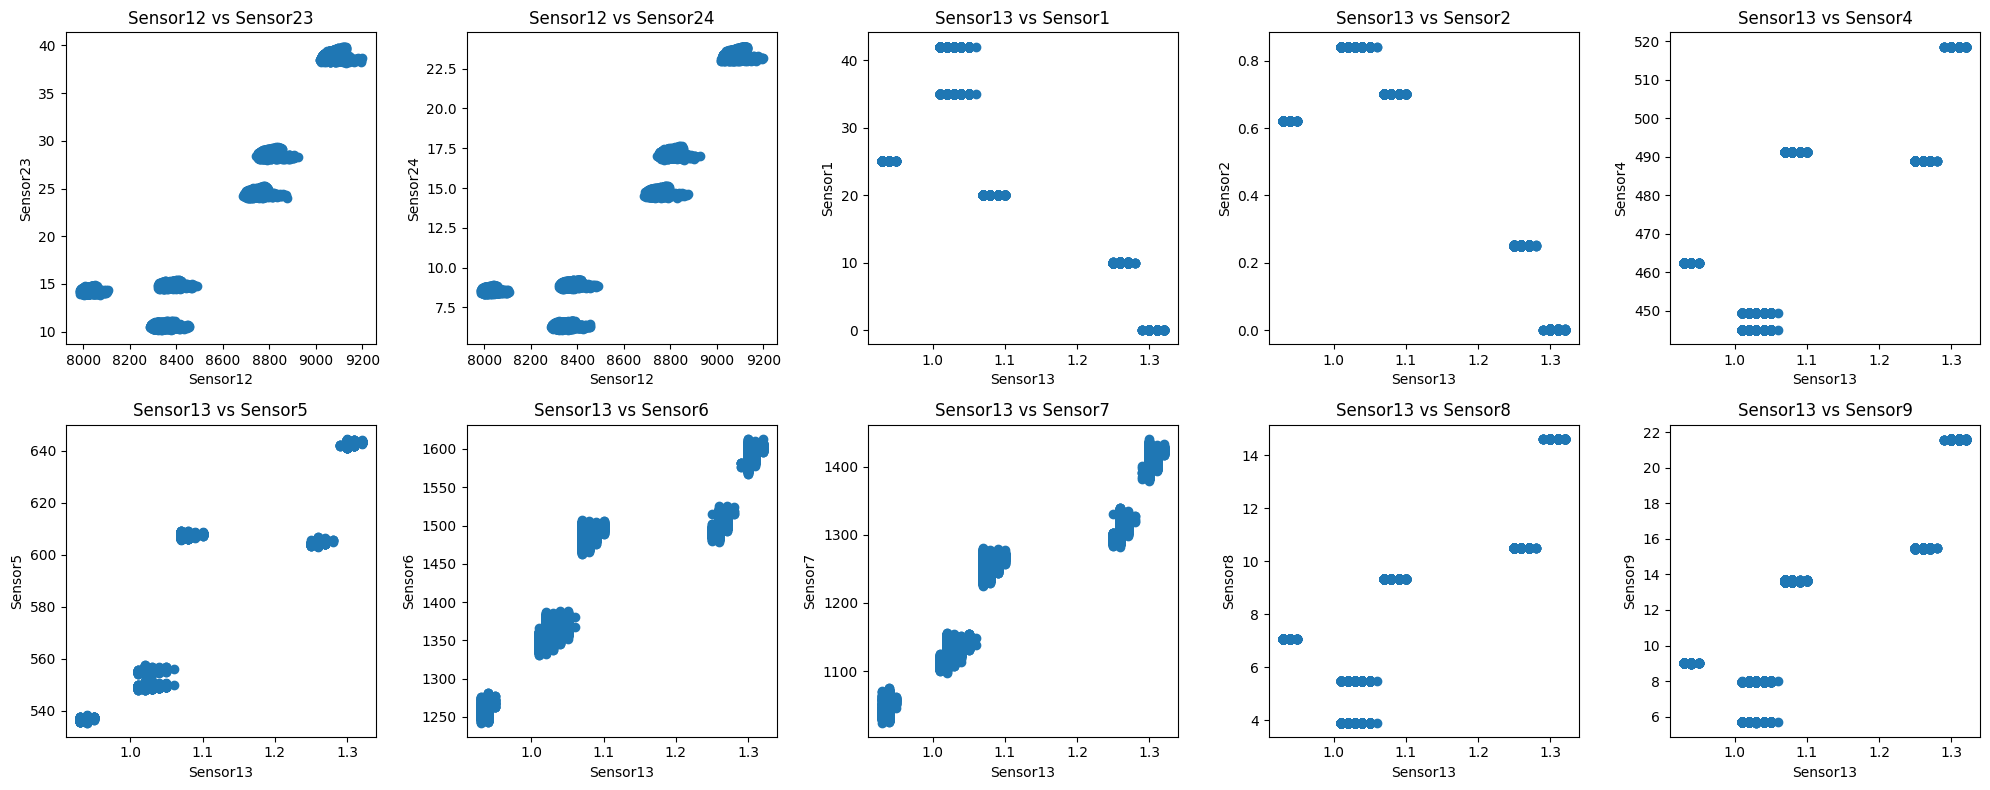

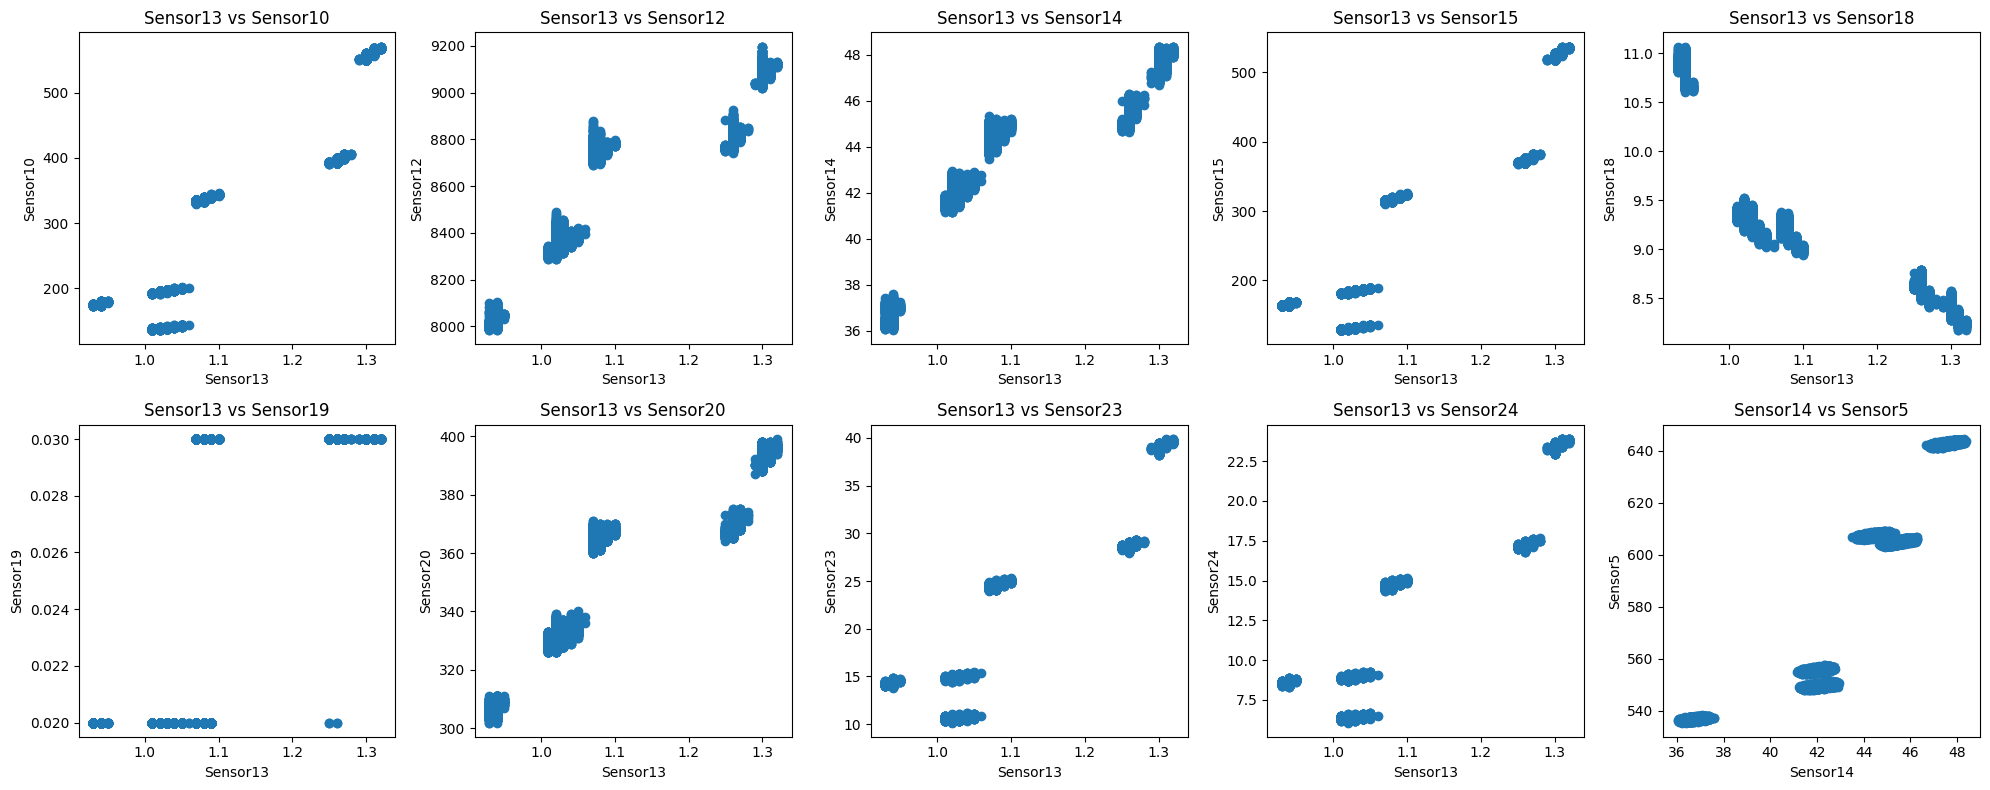

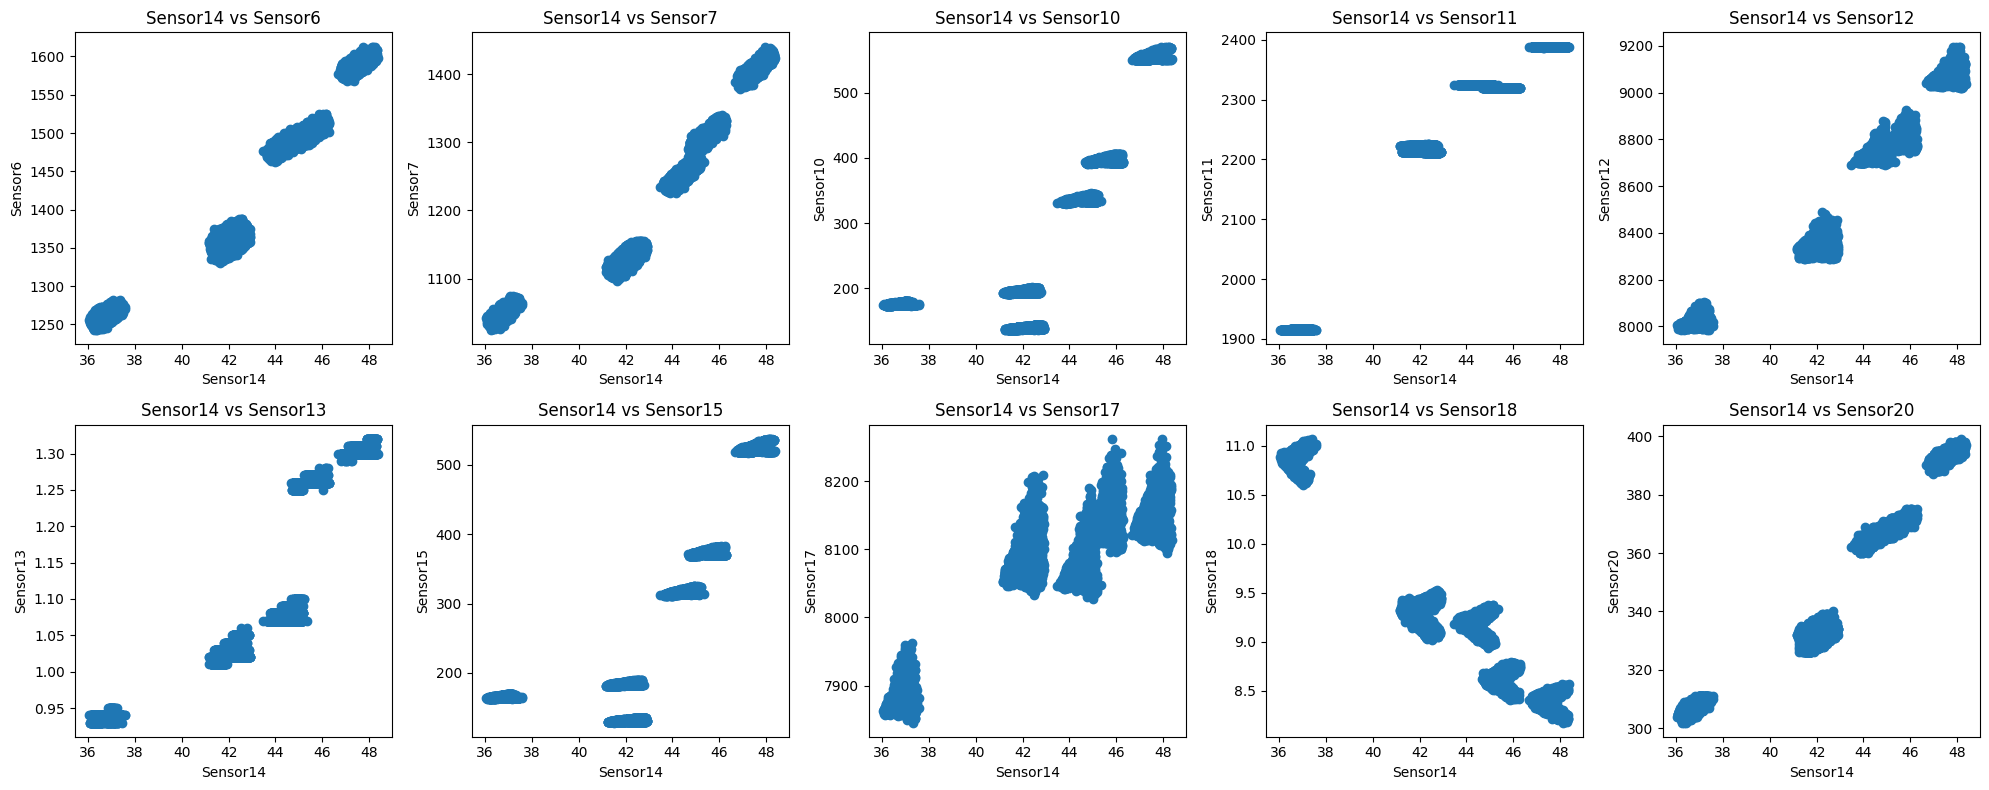

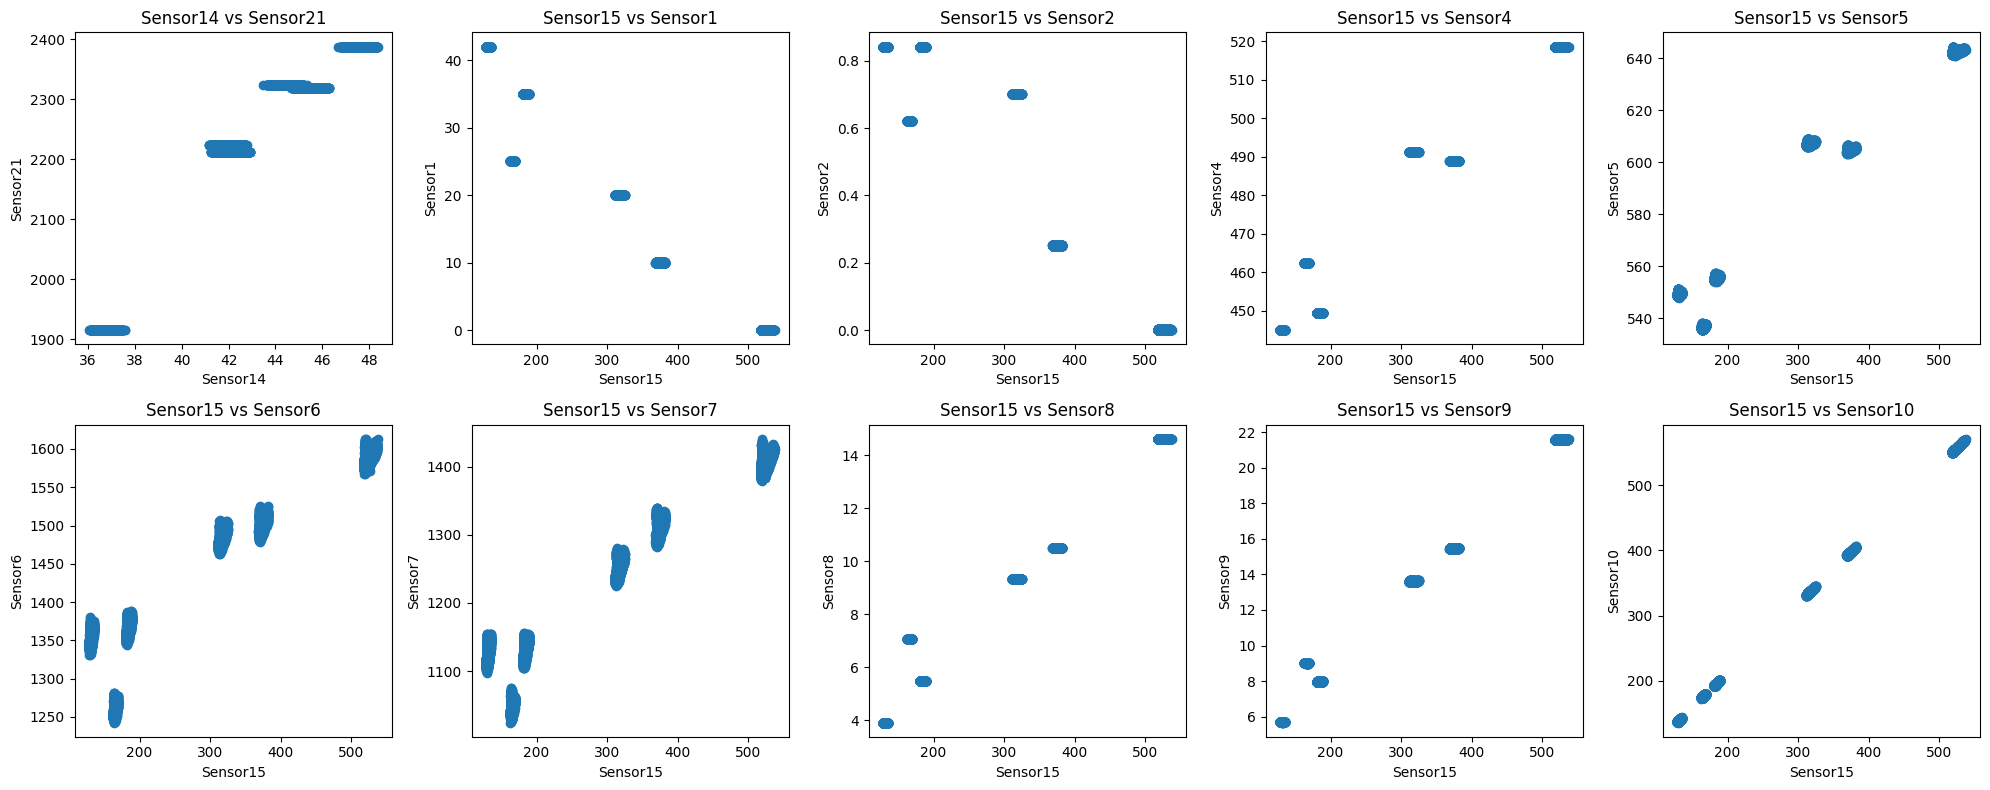

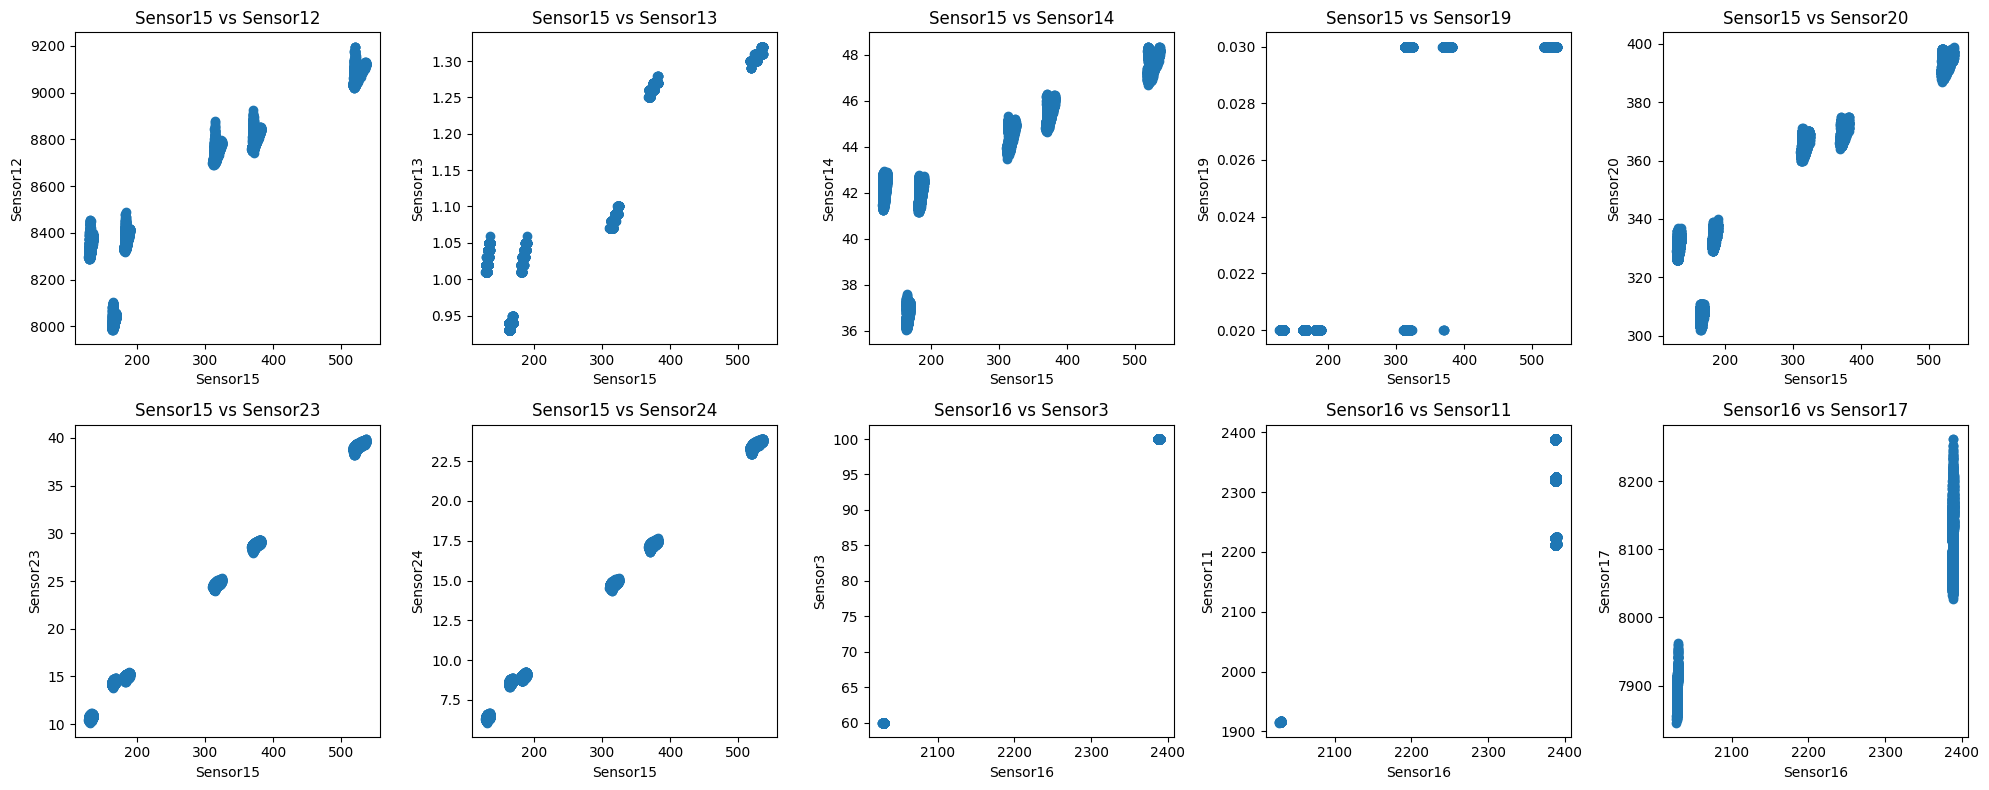

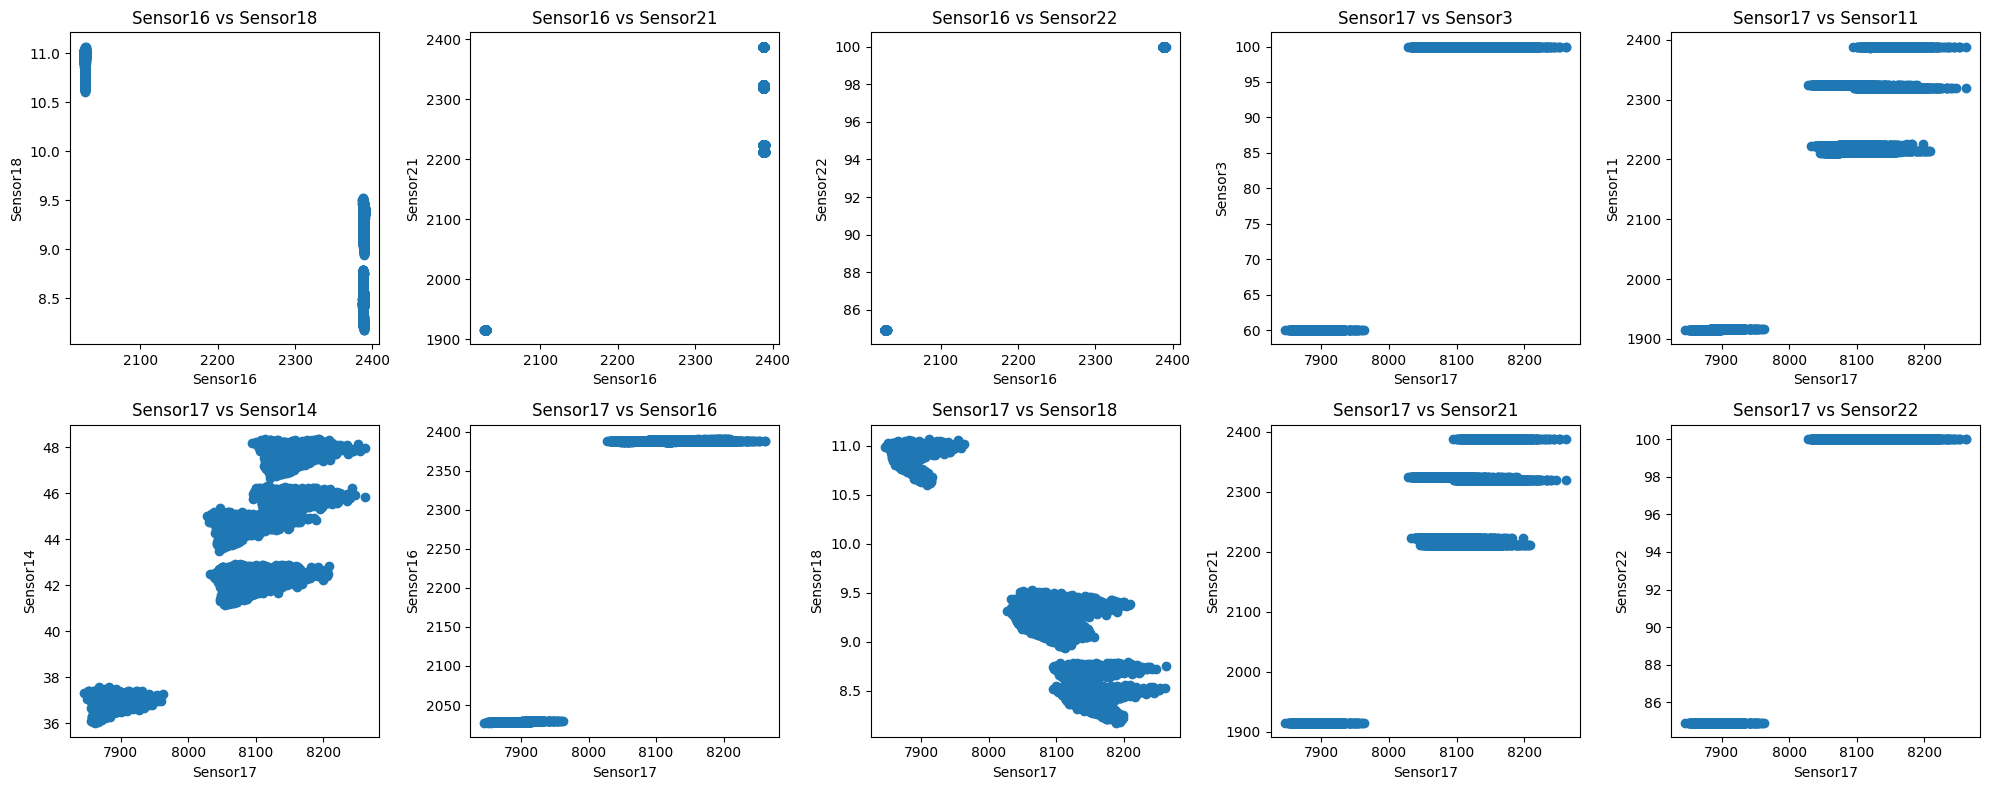

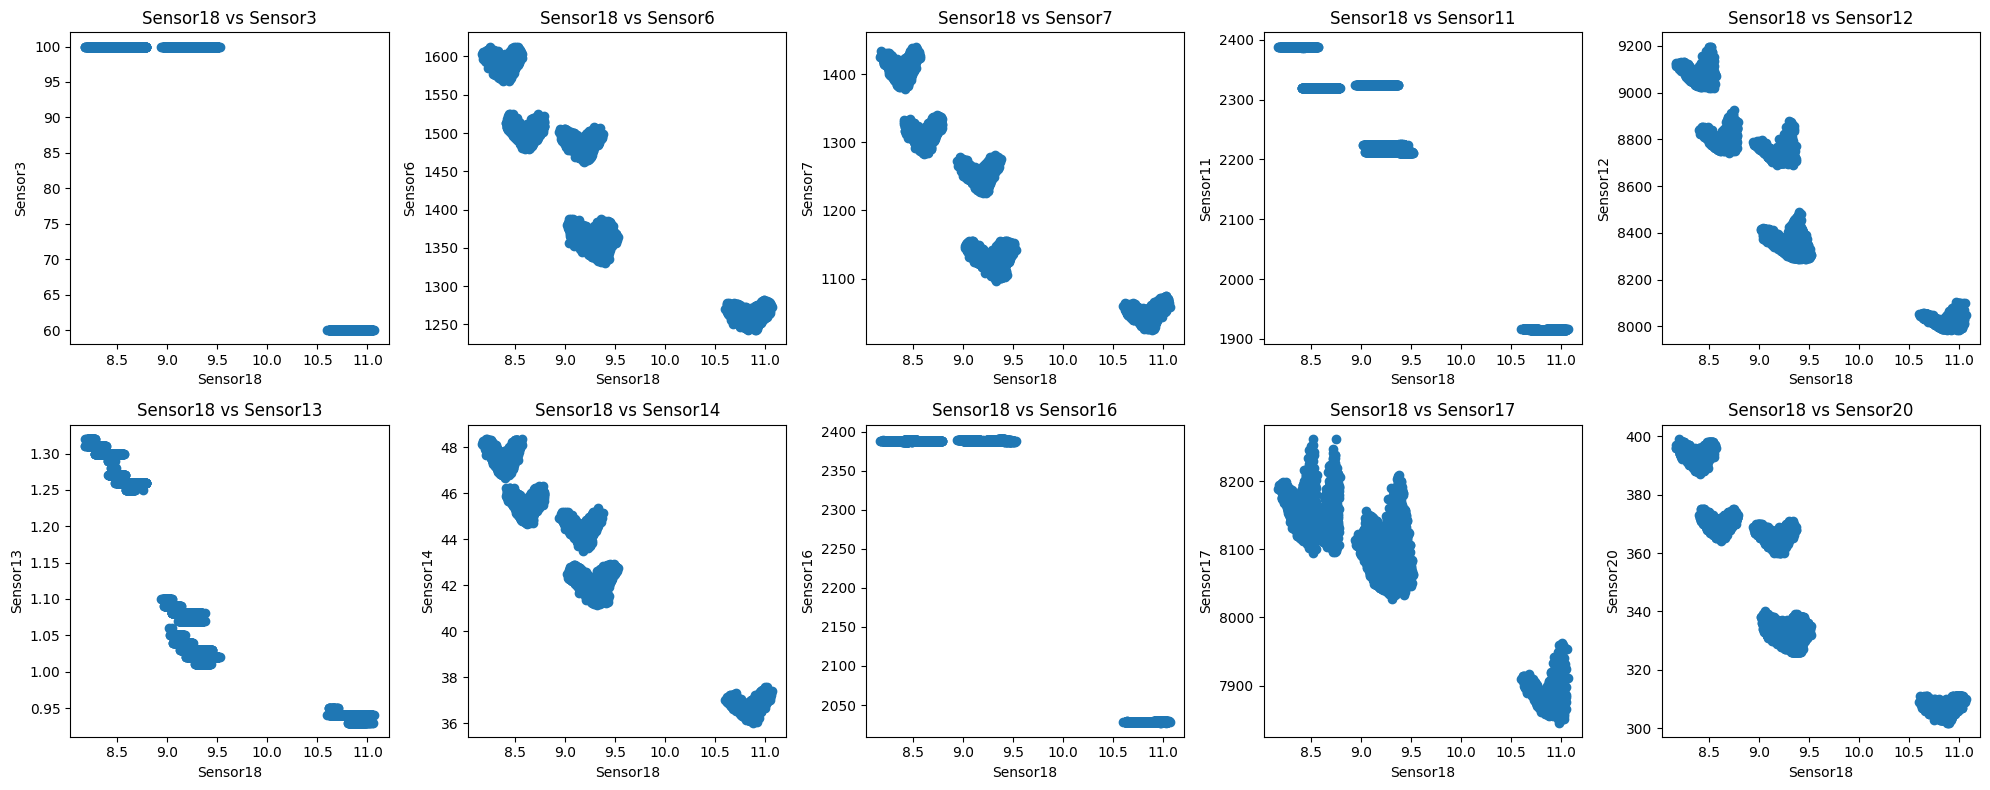

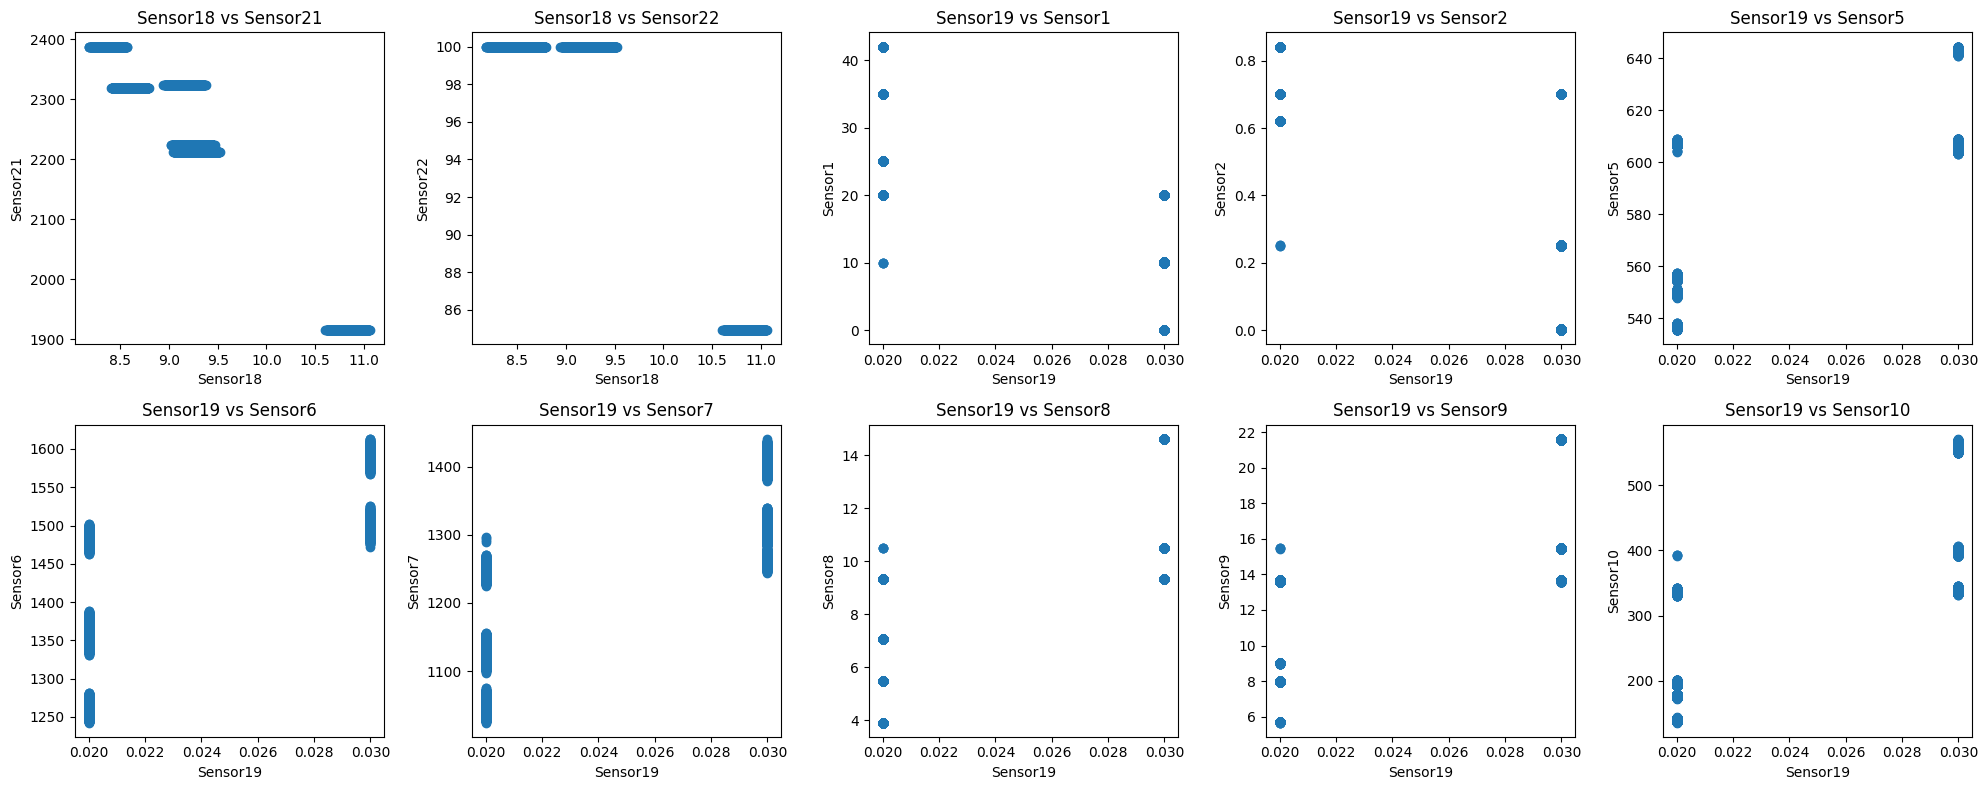

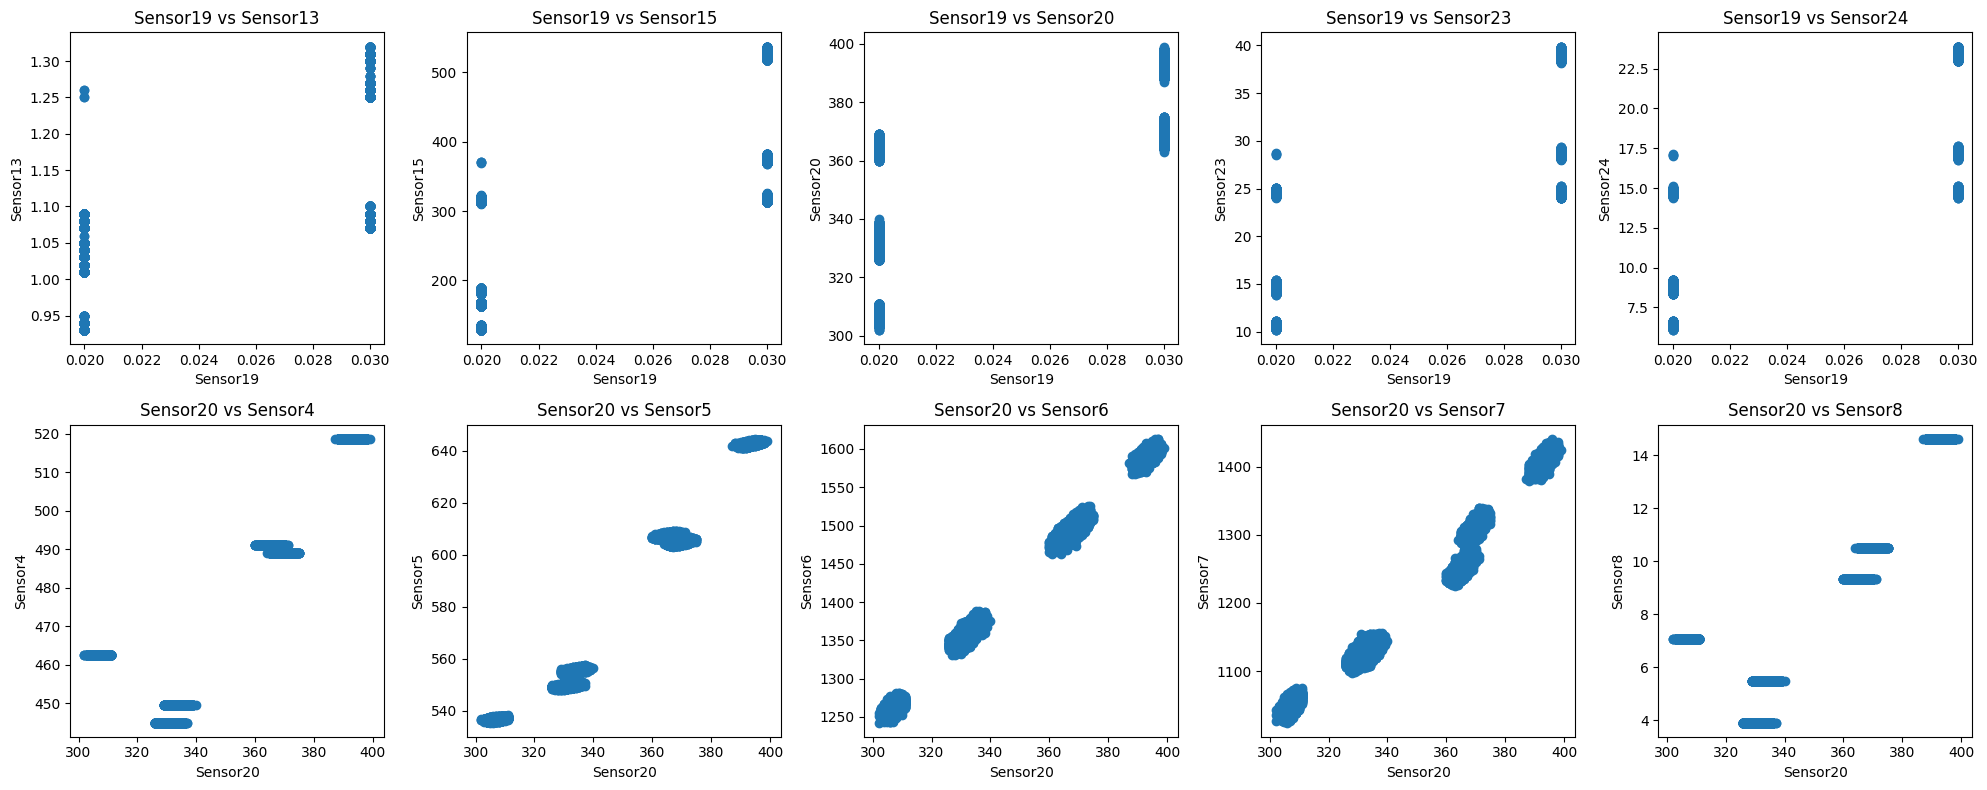

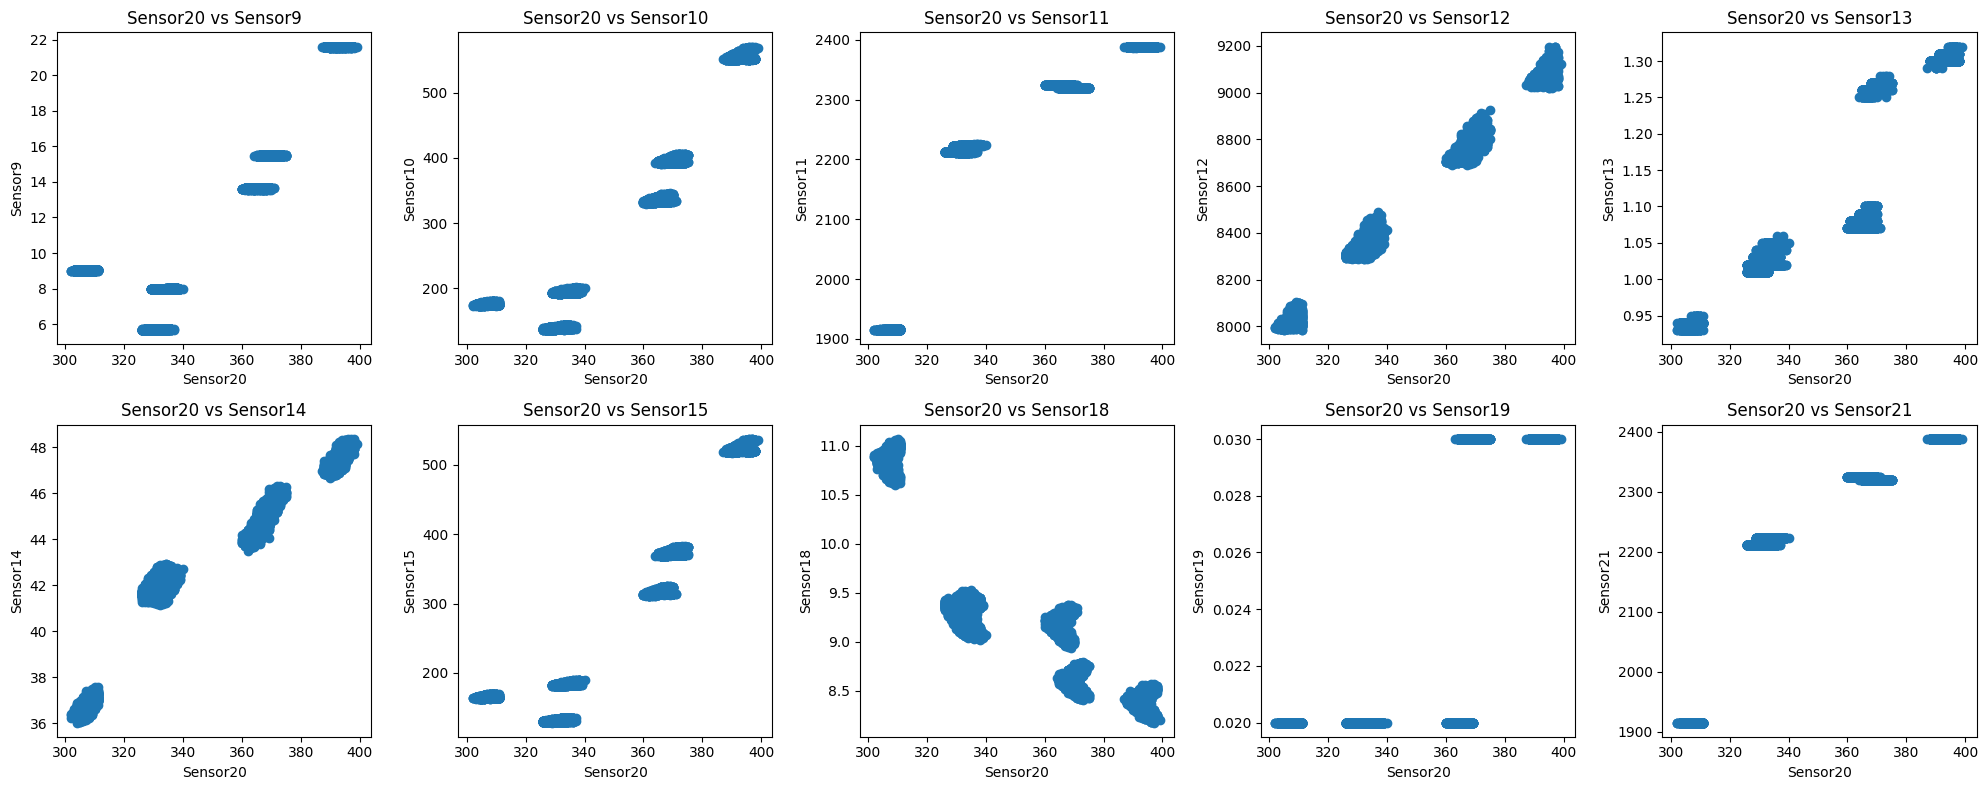

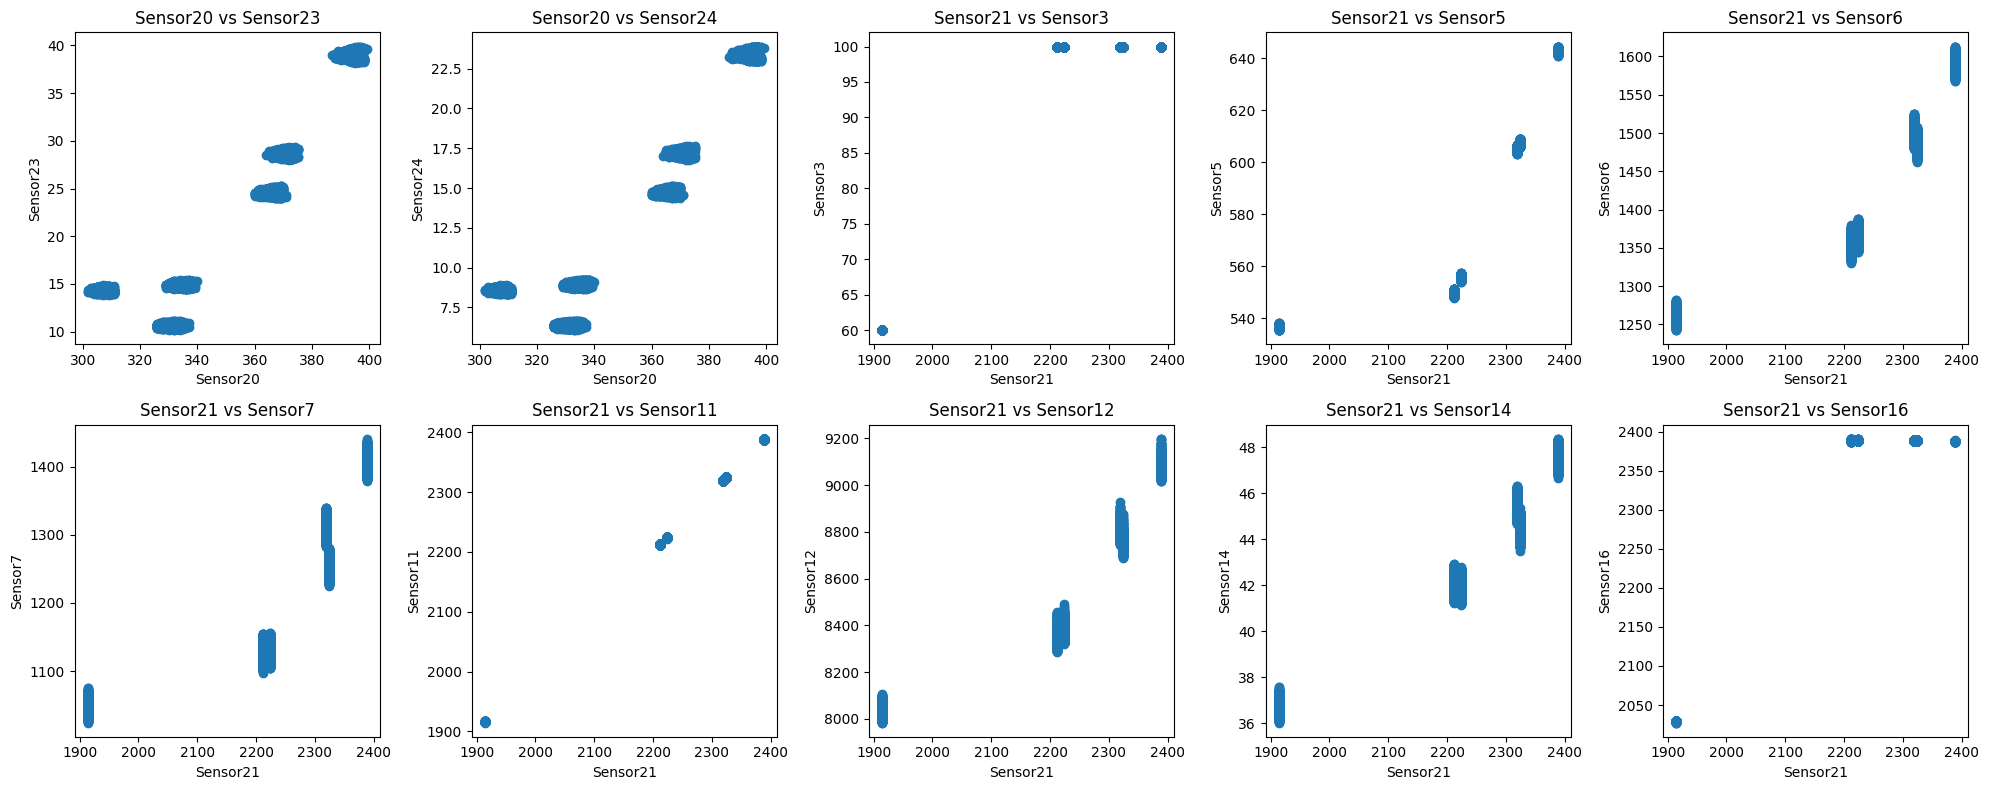

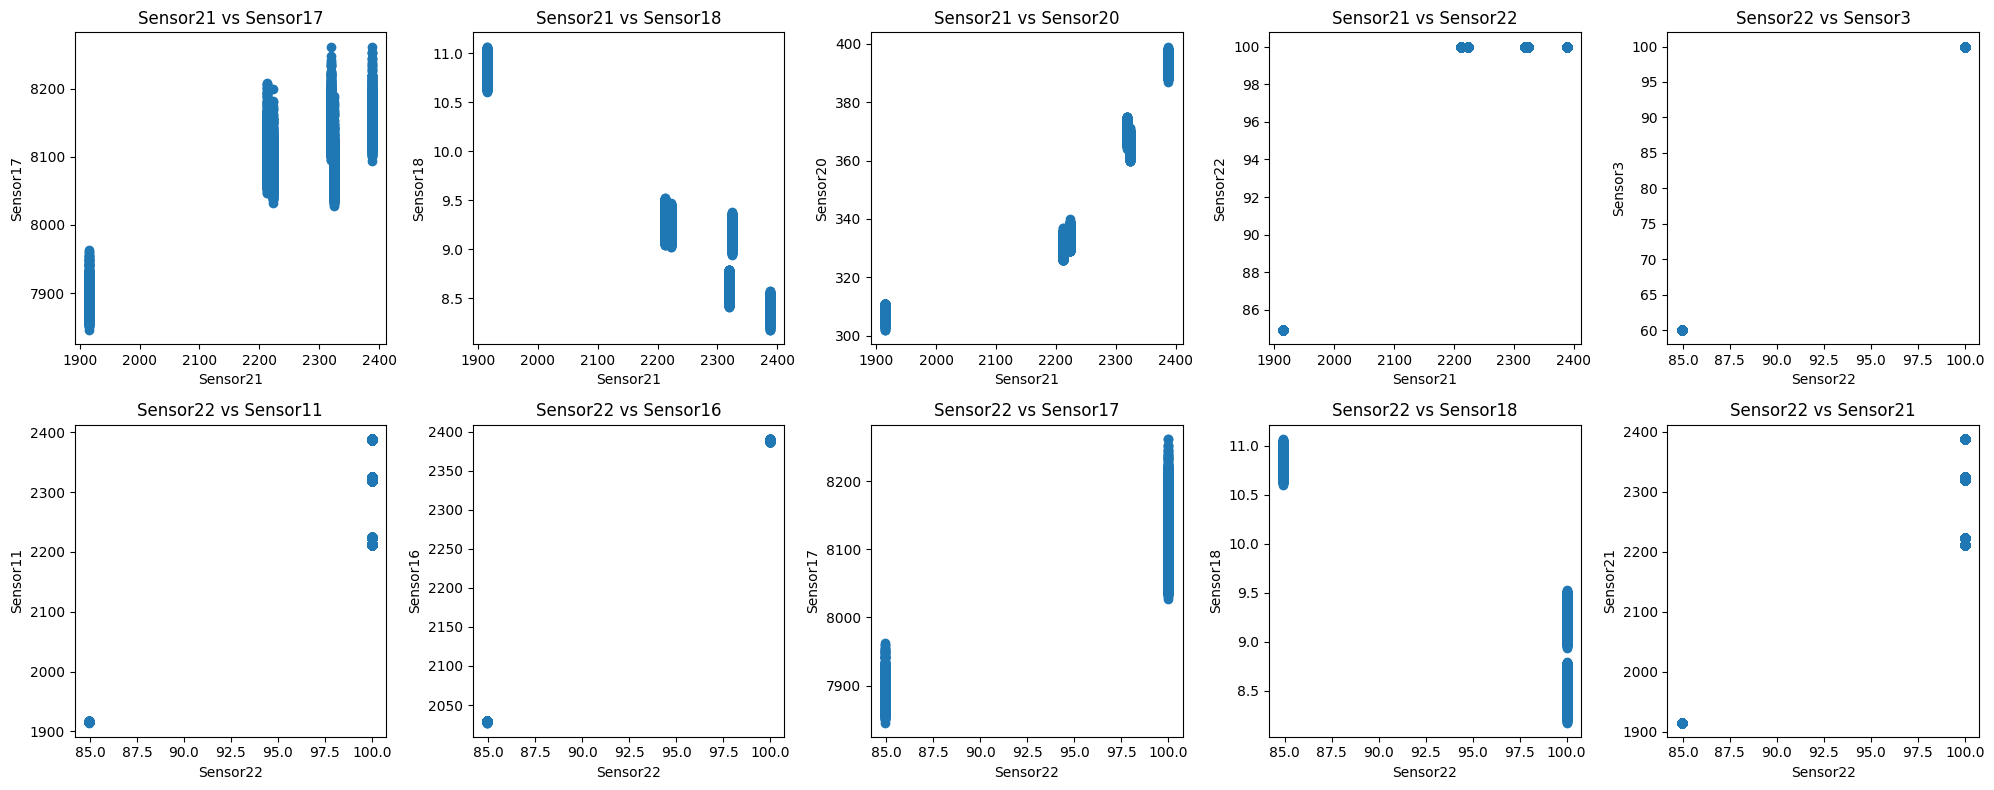

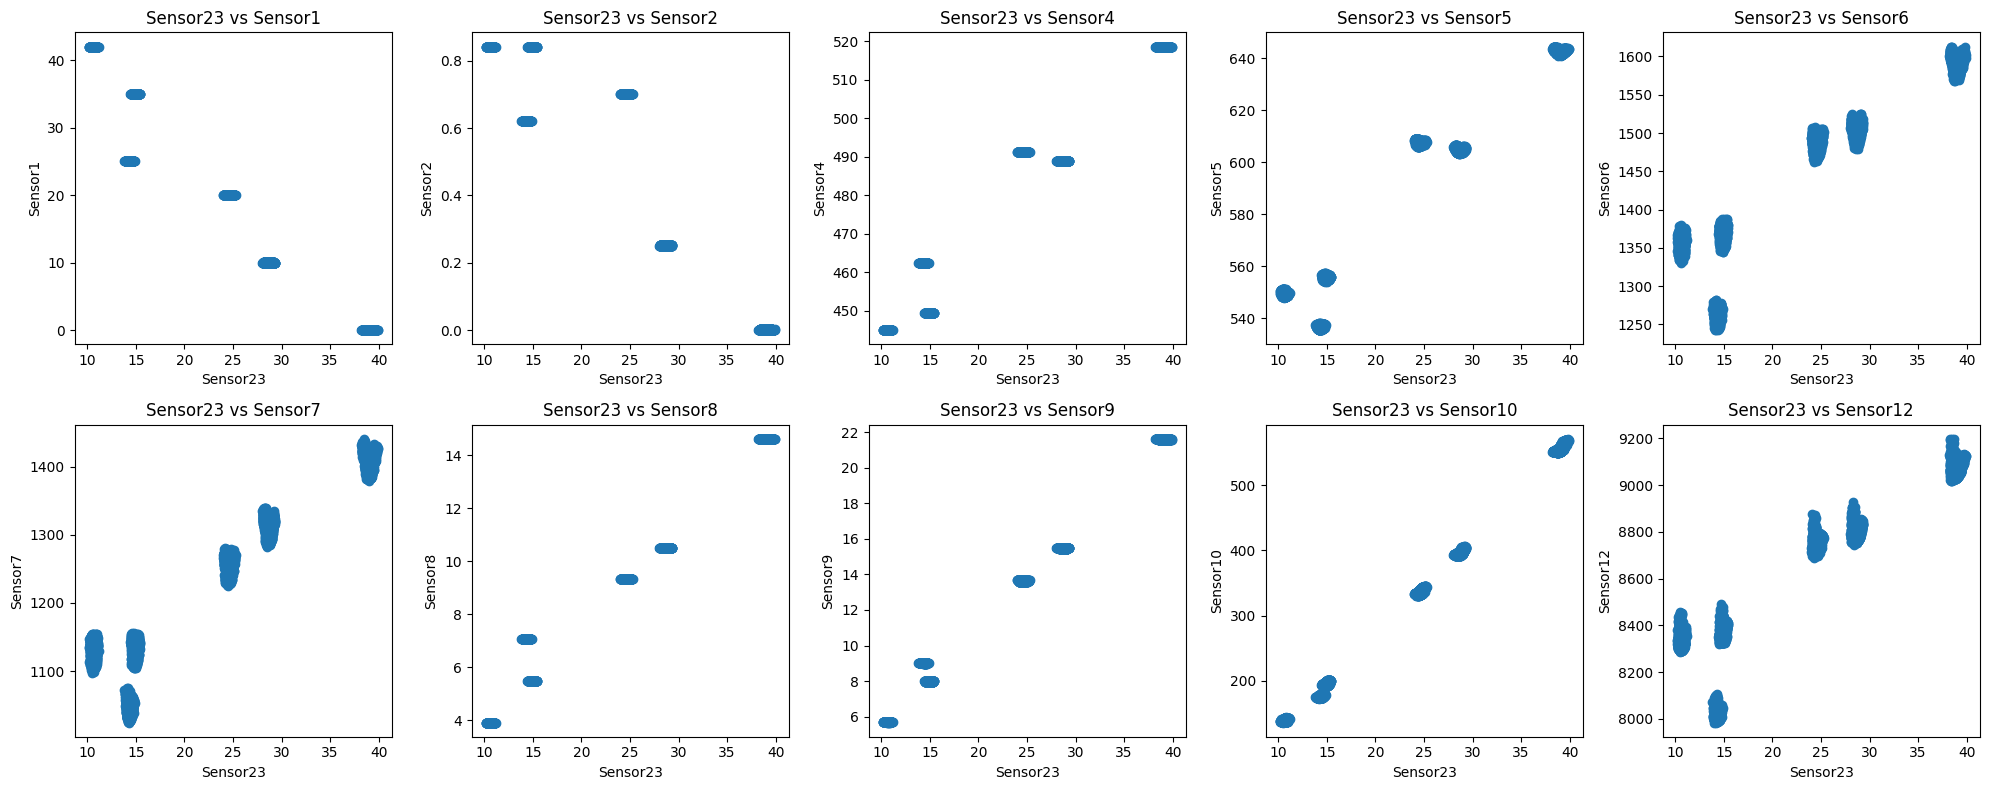

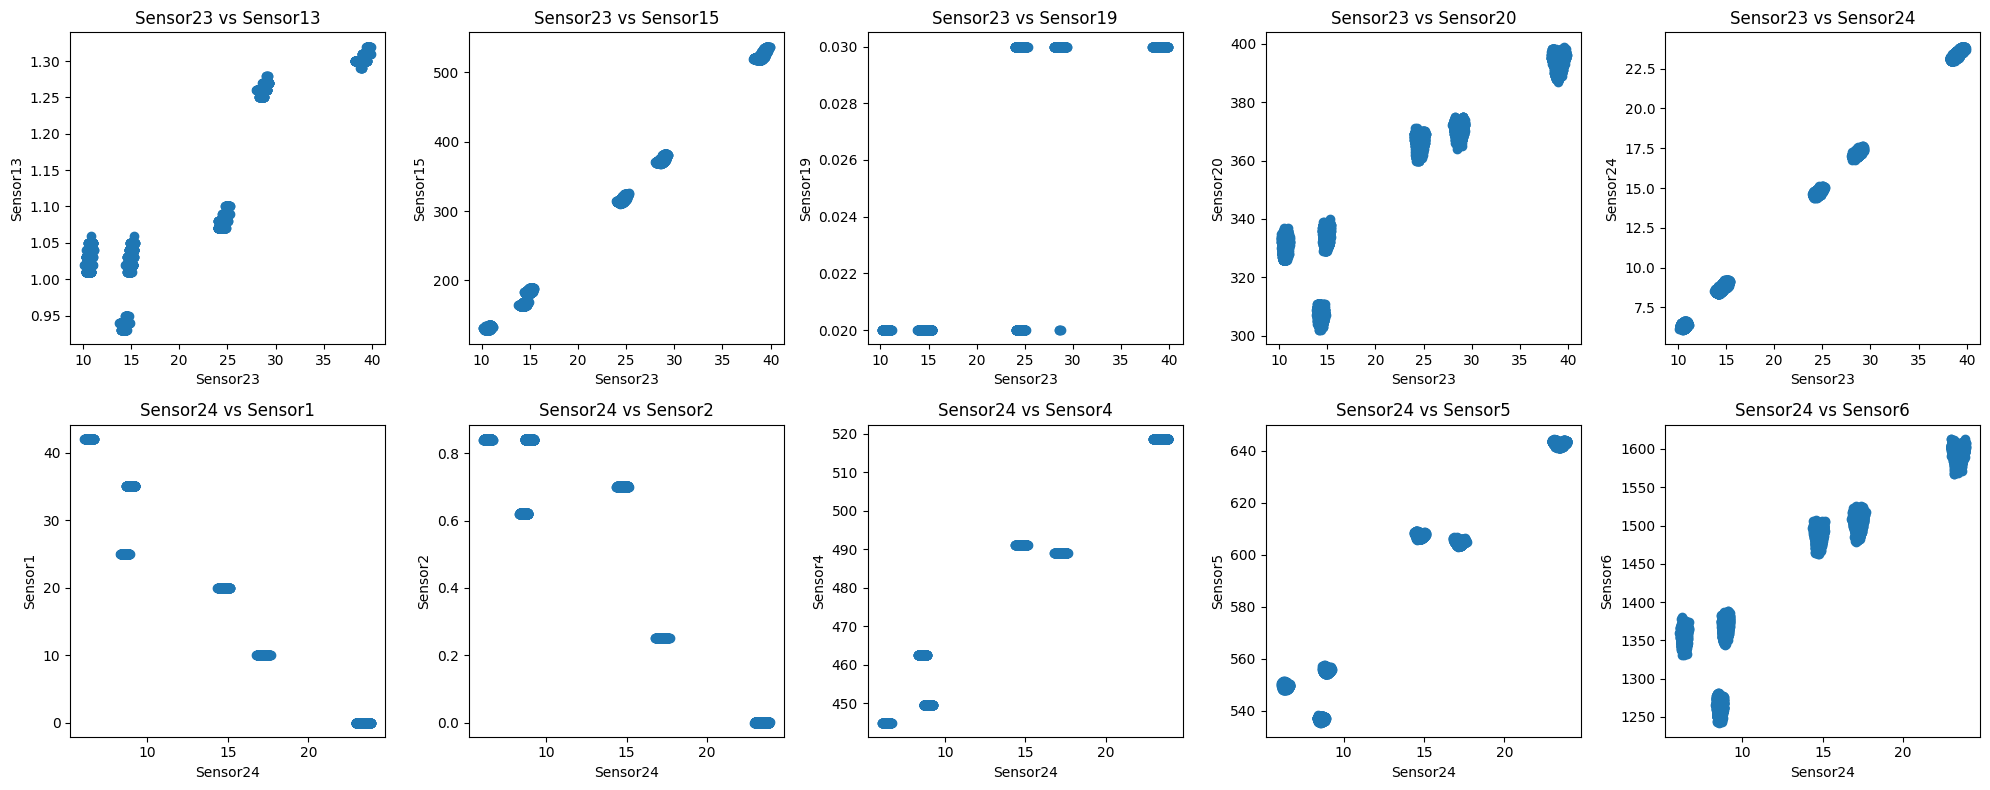

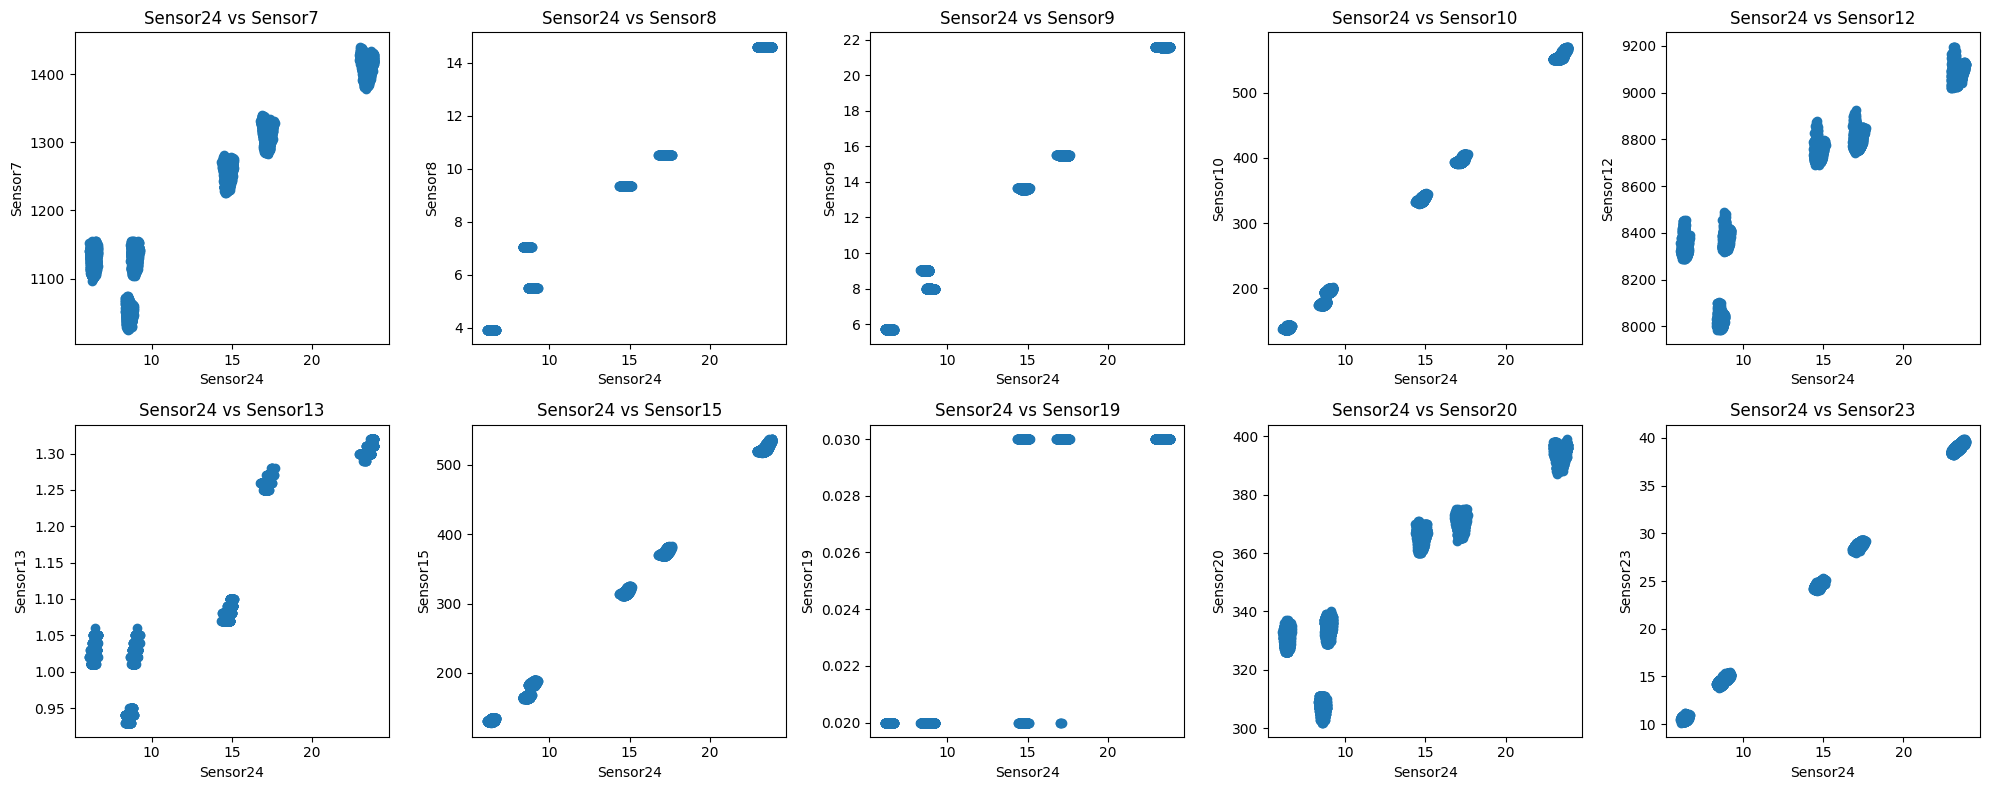

In [11]:
# Scatter plots for bivariate analysis based on Correlation Marrix Value.

corr_matrix = data.corr()
threshold = 0.8
sensors = data.columns

# Number of pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = pairs

for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)

    plt.tight_layout()  
    plt.show()